Data Processing And building machine learning Model
----------------------------------------------------------------------------------

Steps of Preprocessing of data
--------------------------------------------
Step 1] - Import necessary libararies .
Step 2] - Read Data Set .
Step 3] - Sanity Check of Data
Step 4] - Exploratory Data Analysis [EDA]
Step 5] - Missing Value Treatments
Step 6] - Outliers Treatments.
Step 7] - Duplicates and Garbage Value treatment.
Step 8] - Normalization 
Step 9] - Encoding of Data  
Step 9] - Encoding of Data  
Step 10] - Feature Selection


# Comprehensive Assessment : Machine Learning

Problem Description:

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.


Business Goal:

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.

Dataset:  https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link

Our aim is to develop a model that can predict the price of car and wich factures are influencing the price of cars.

Key Factors to Consider:

Age: Older individuals might have more financial stability and experience.
Income: Higher income generally indicates better financial capacity.
Homeownership: Homeowners might be perceived as more responsible and financially stable.
Work experience: A longer work history suggests stability and financial reliability.
Credit history: Past credit behavior, including payment history, credit utilization, and credit inquiries, is a crucial factor.

# Key components to be fulfilled :

1. Loading and Preprocessing 
 Load the dataset and perform necessary preprocessing steps.


# Step 1: Import Necessary Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Read DataSet

In [4]:
df=pd.read_csv("C:\\Users\\rajan\\Downloads\\CarPrice_Assignment (1).csv")

In [5]:
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [6]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [7]:
#head
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [8]:
#tail
df.tail()

car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
203   sedan        rwd          front      109.1  ...         145         idi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
200       3.78    3.15              9.5        114     5400      23   
201       3.78    3.15              8.7        160     5300      19   
202       3.58    2.87              8.8        134     5500      18   
203       3.01    3.40             23.0        106     4800      26   
204       3.78    3.15              9.5        114     5400      19   

     highwaympg    price  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[5 rows x 26 columns]

# Step 3: Sanity Check of Data

In [9]:
#Shape
df.shape

(205, 26)

In [10]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [12]:
# Extract brand and model
df['Brand'] = df['CarName'].apply(lambda x: x.split()[0])
df['Model'] = df['CarName'].apply(lambda x: ' '.join(x.split()[1:]))

print(df[['CarName', 'Brand', 'Model']])

df.head()


                      CarName        Brand         Model
0          alfa-romero giulia  alfa-romero        giulia
1         alfa-romero stelvio  alfa-romero       stelvio
2    alfa-romero Quadrifoglio  alfa-romero  Quadrifoglio
3                 audi 100 ls         audi        100 ls
4                  audi 100ls         audi         100ls
..                        ...          ...           ...
200           volvo 145e (sw)        volvo     145e (sw)
201               volvo 144ea        volvo         144ea
202               volvo 244dl        volvo         244dl
203                 volvo 246        volvo           246
204               volvo 264gl        volvo         264gl

[205 rows x 3 columns]


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  boreratio  stroke  \
0  convertible        rwd          front       88.6  ...       3.47    2.68   
1  convertible        rwd          front       88.6  ...       3.47    2.68   
2    hatchback        rwd          front       94.5  ...       2.68    3.47   
3        sedan        fwd          front       99.8  ...       3.19    3.40   
4        sedan        4wd          front       99.4  ...       3.19    3.40   

   compressionratio  horsepower peakrpm citympg  highwaympg    price  \
0               9.0         111    5000      21          27  13495.0   
1               9.0         111    5000      21          27  16500.0   
2               9.0         154    5000      19          26  16500.0   
3              10.0         102    5500      24          30  13950.0   
4               8.0         115    5500      18          22  17450.0   

         Brand         Model  
0  alfa-romero        giulia  
1  alfa-romero       stelvio  
2  alfa-romero  Quadrifoglio  
3         audi        100 ls  
4         audi         100ls  

[5 rows x 28 columns]

In [15]:
df.shape

(205, 28)

In [16]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Brand', 'Model'],
      dtype='object')

In [18]:
#Finding Missing Values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Brand               0
Model               0
dtype: int64

No null values found.

In [24]:
#For Finding The Percentage of Missing Value
df.isnull().sum()/df.shape[0]*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [25]:
#Finding Duplicates 
df.duplicated().sum()

0

no duplicates found.

In [19]:
df.drop_duplicates(inplace=True) # drop duplicates and update df
df.duplicated().sum() # show duplicate count

0

In [20]:
#Identifying Garbage Value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*15)

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64
*********************************************
fueltype
gas       185
diesel     20
Name: count, dtype: int64
*********************************************
aspiration
std      168
turbo     37
Name: count, dtype: int64
*********************************************
doornumber
four    115
two      90
Name: count, dtype: int64
*********************************************
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
*********************************************
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
*********************************************
engineloca

In [28]:
#No garbage values

# Step 4- Exploratory Data Analysis

In [21]:
#Descriptive Statistics
df.describe()  #Numerical Column


car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [22]:
df.describe(include="object")

CarName fueltype aspiration doornumber carbody drivewheel  \
count             205      205        205        205     205        205   
unique            147        2          2          2       5          3   
top     toyota corona      gas        std       four   sedan        fwd   
freq                6      185        168        115      96        120   

       enginelocation enginetype cylindernumber fuelsystem   Brand Model  
count             205        205            205        205     205   205  
unique              2          7              7          8      28   142  
top             front        ohc           four       mpfi  toyota   504  
freq              202        148            159         94      31     6

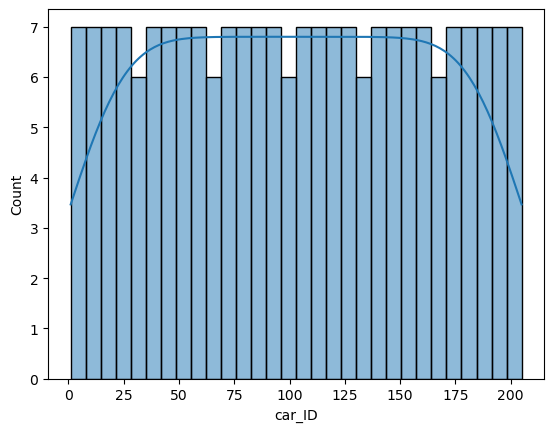

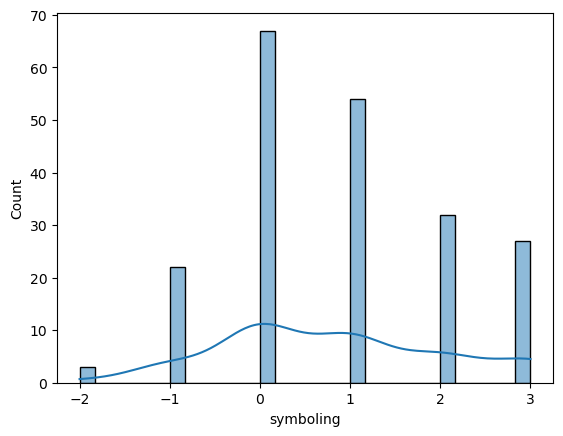

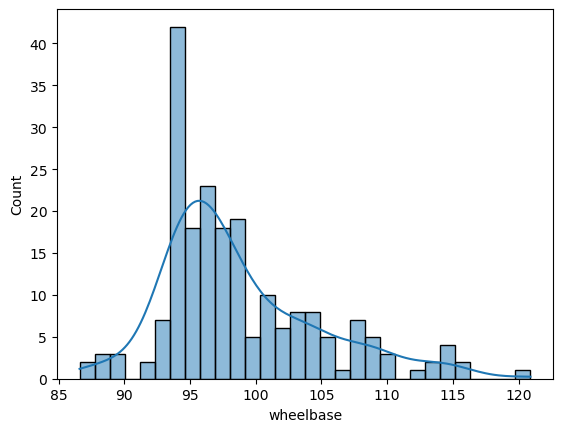

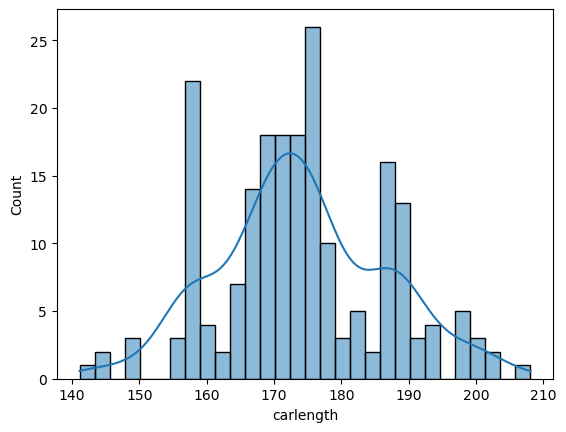

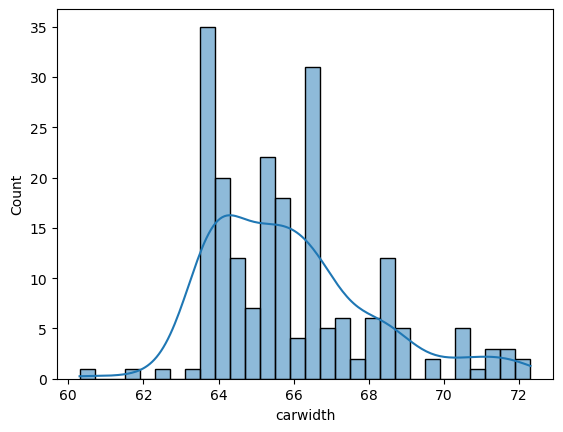

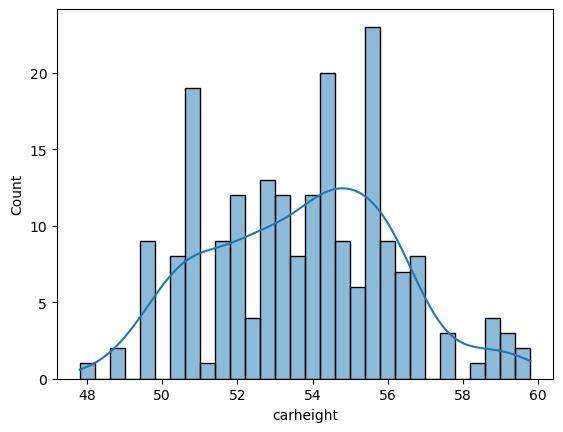

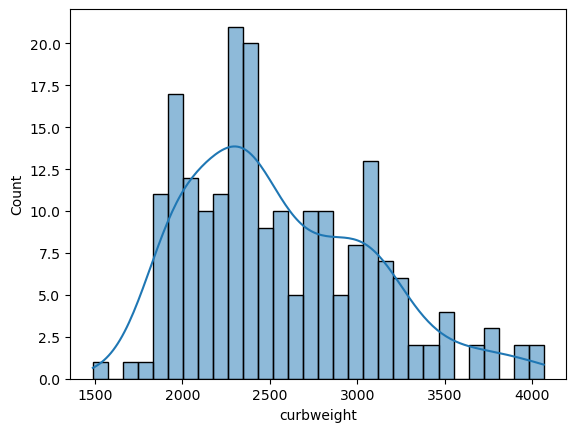

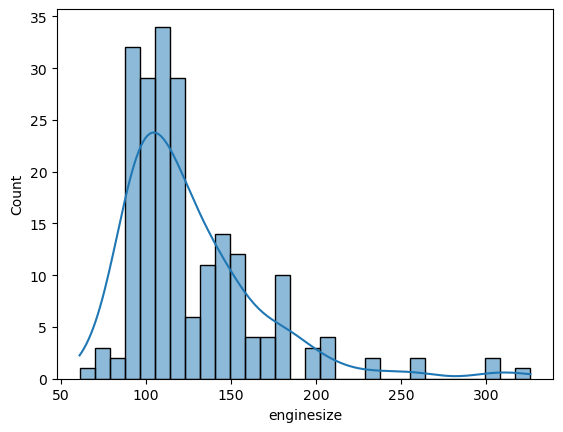

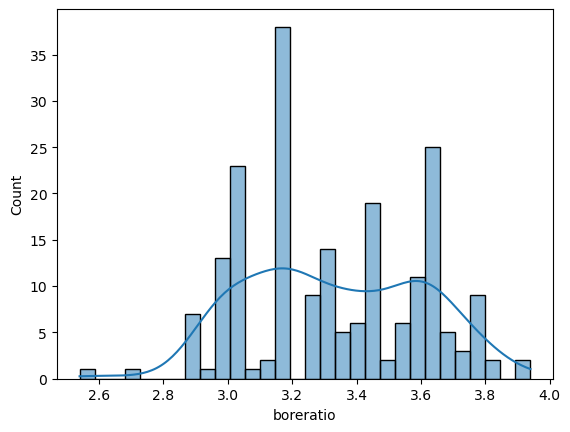

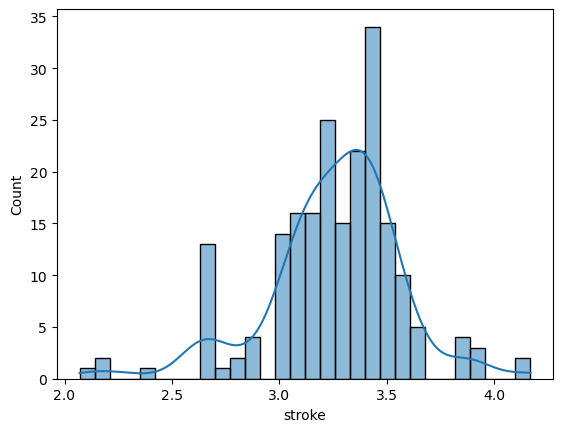

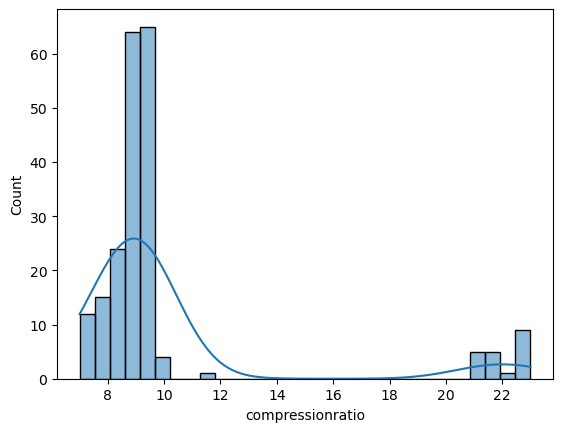

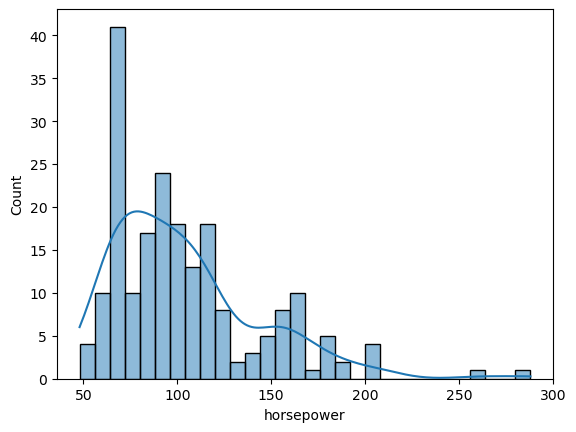

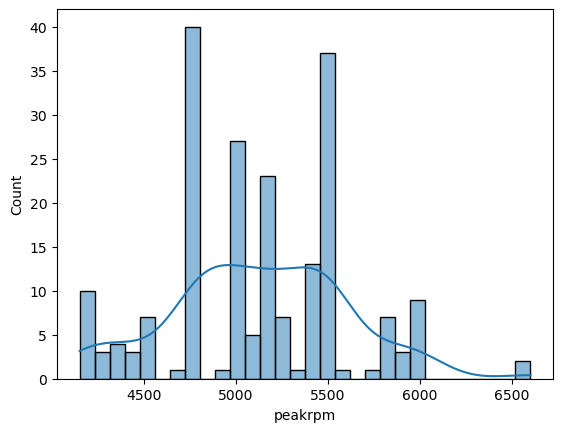

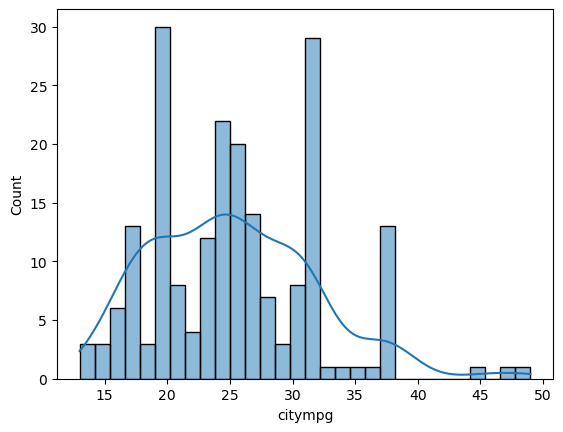

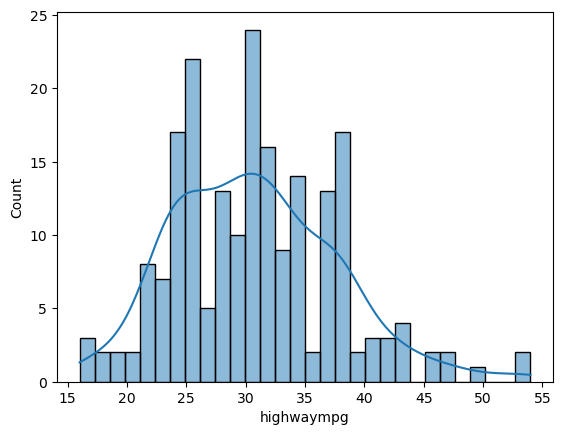

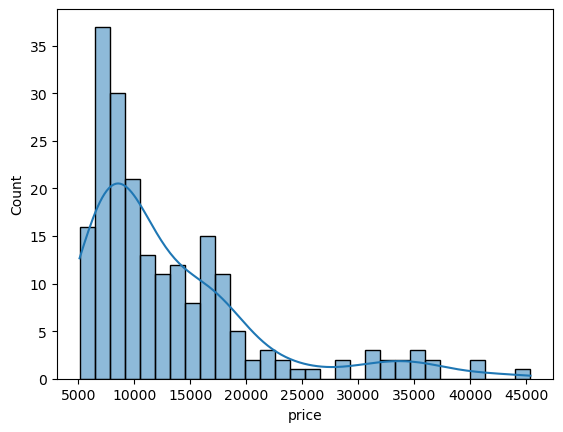

In [23]:
#Histogram to understand the distribution 
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,bins=30,kde='True')
  plt.show()


array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>],
       [<Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

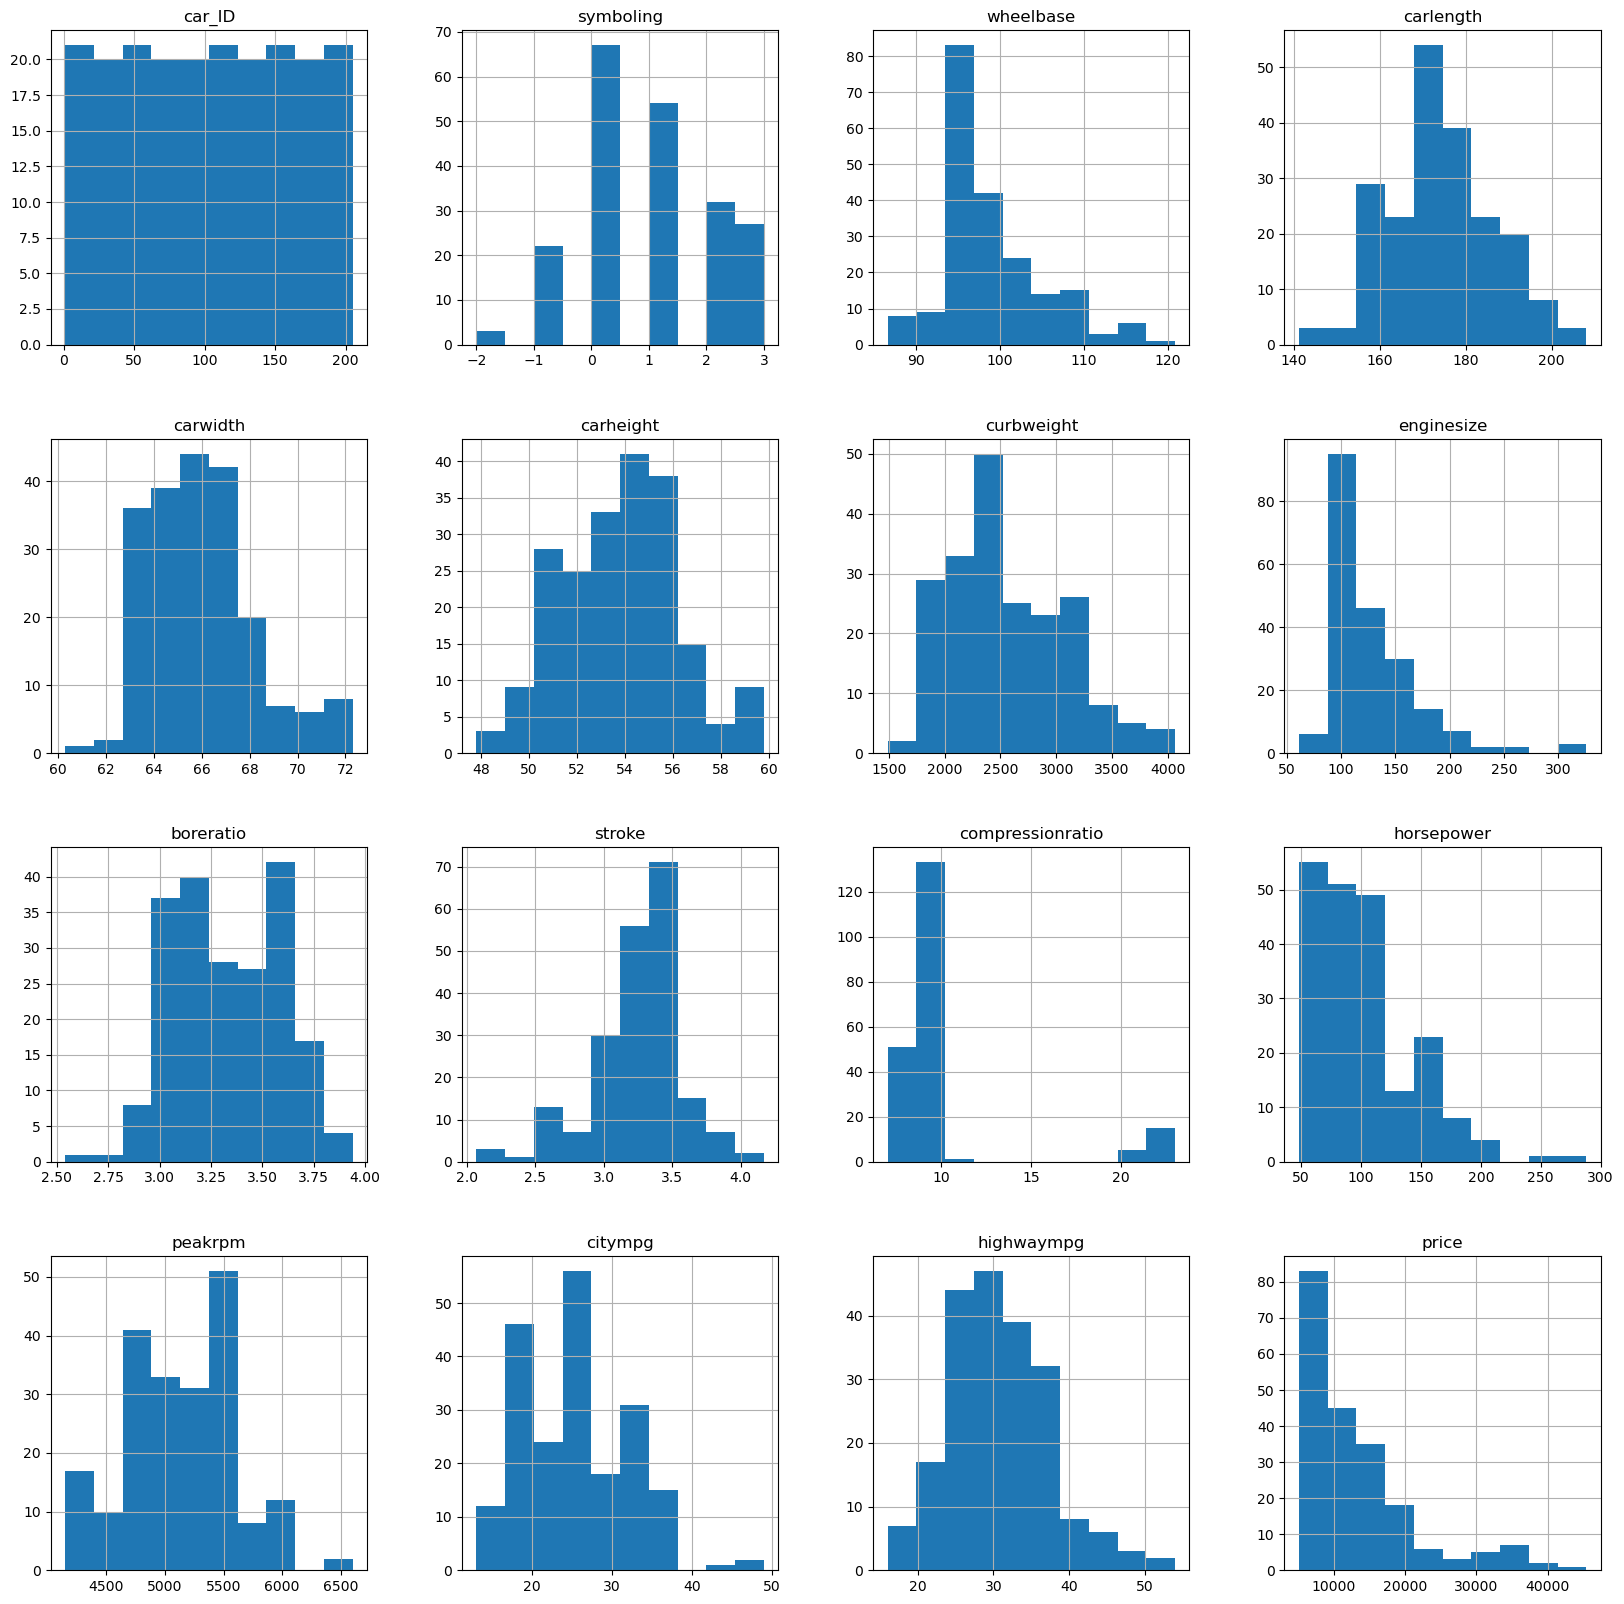

In [24]:
df.hist(figsize = (20,20))

In [25]:
df.select_dtypes(include="number").columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

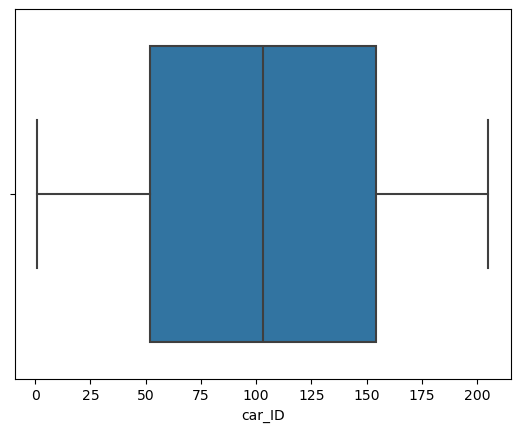

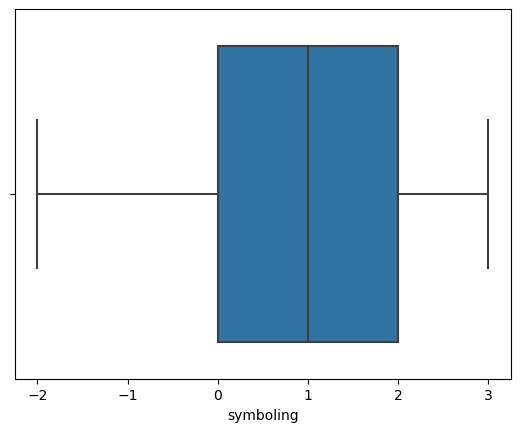

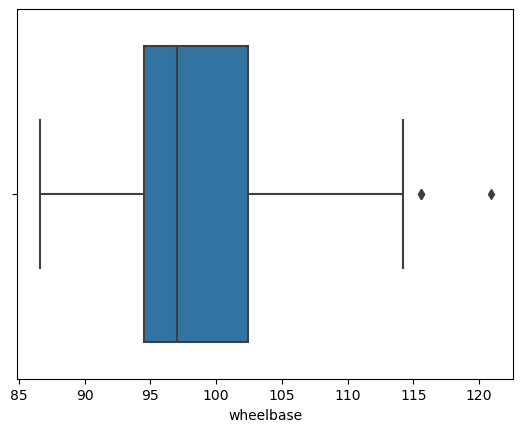

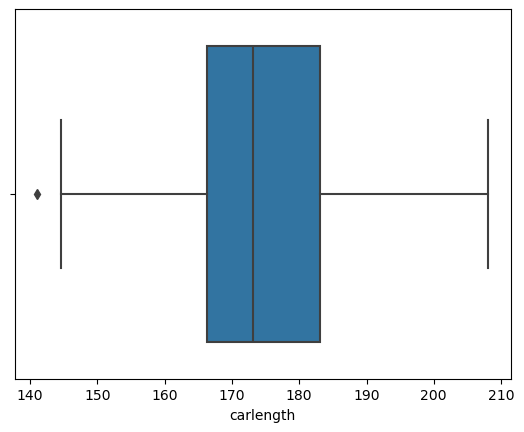

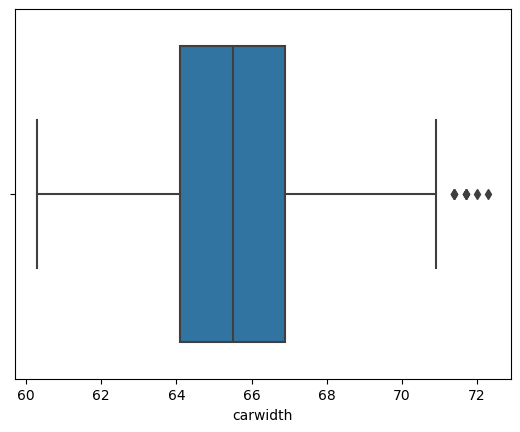

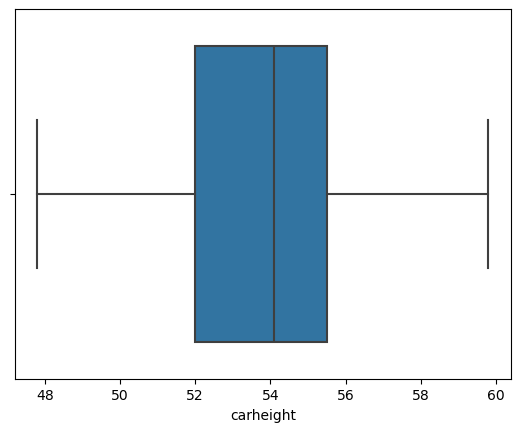

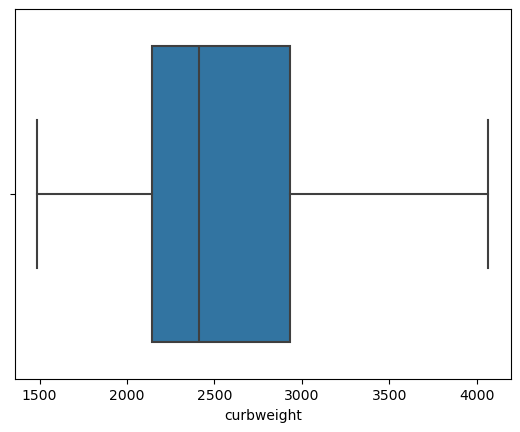

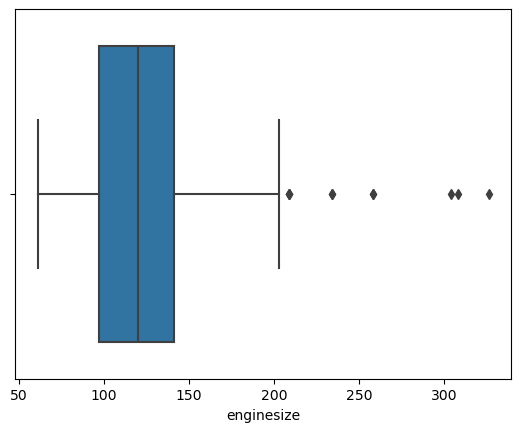

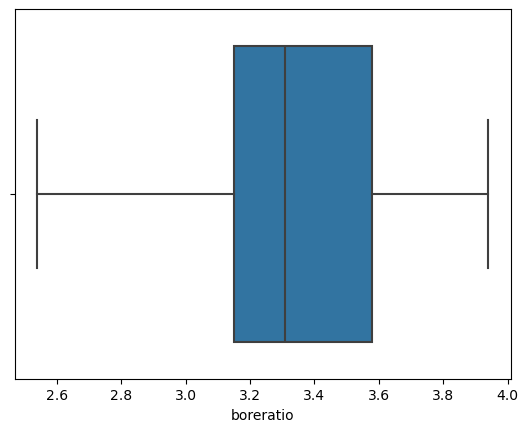

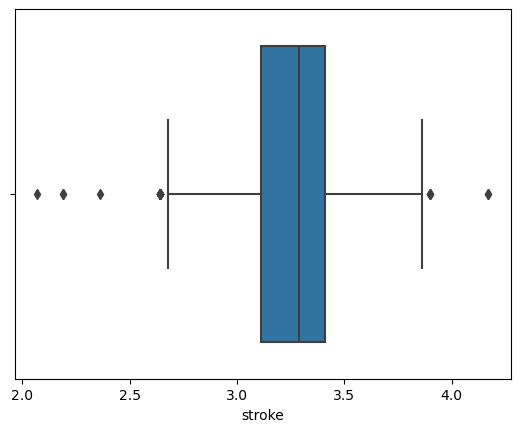

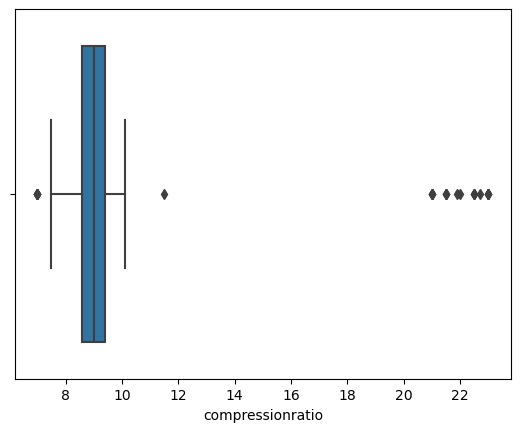

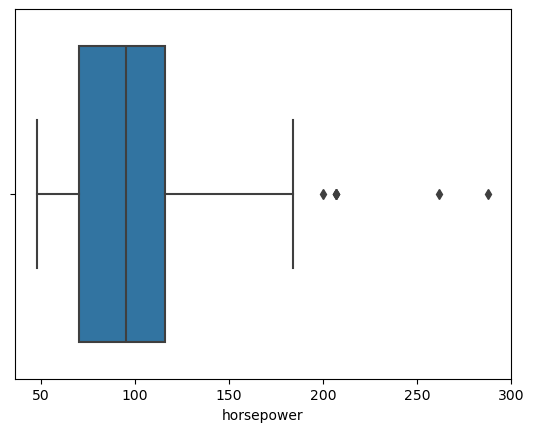

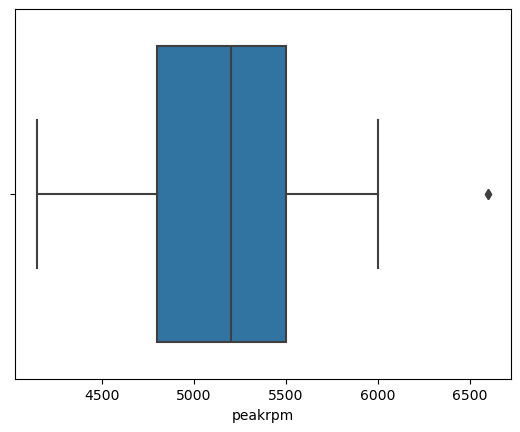

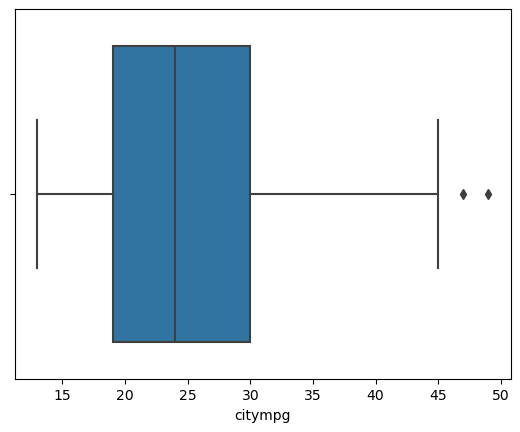

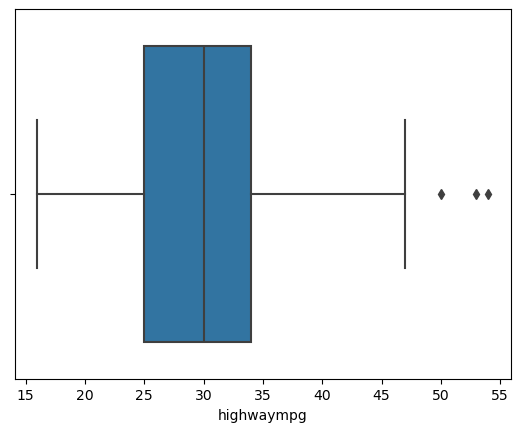

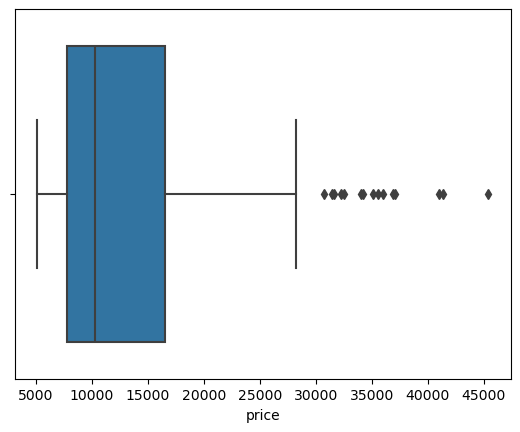

In [26]:
#Boxplot to understand the ouliers 
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

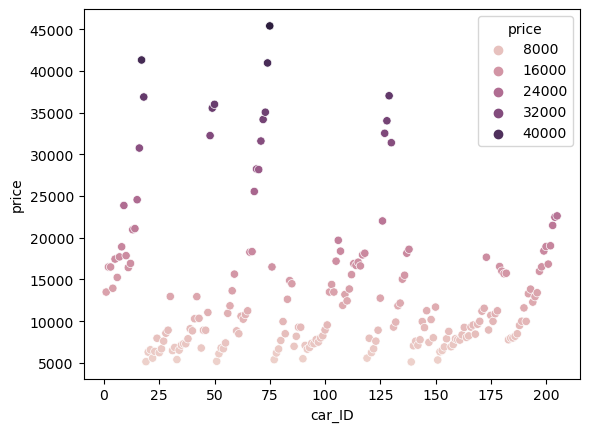

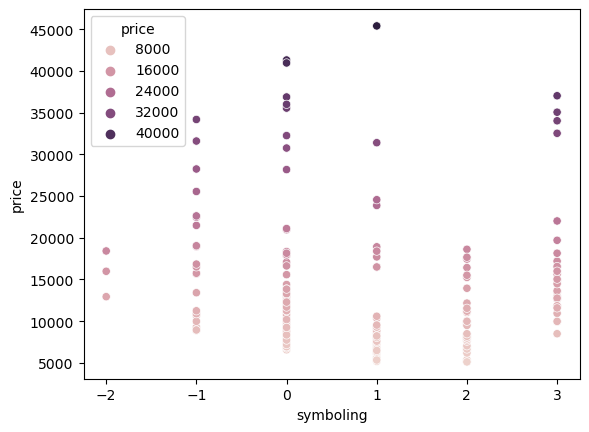

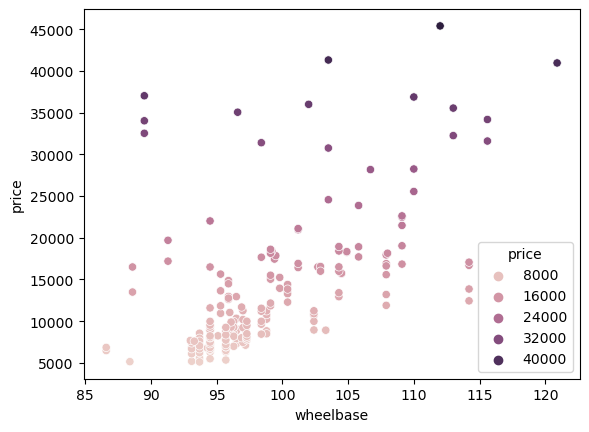

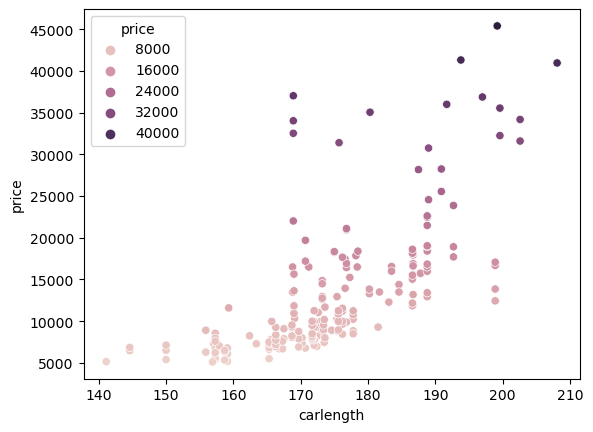

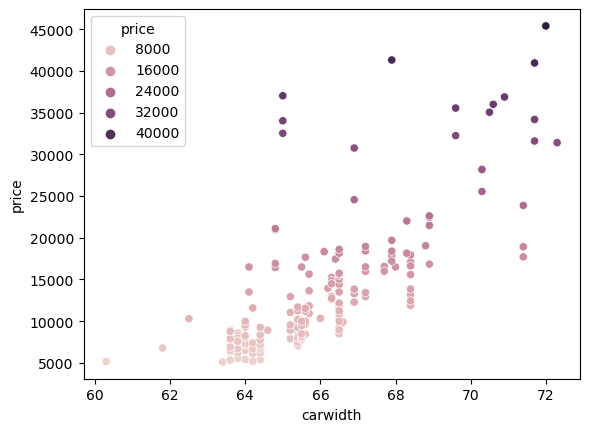

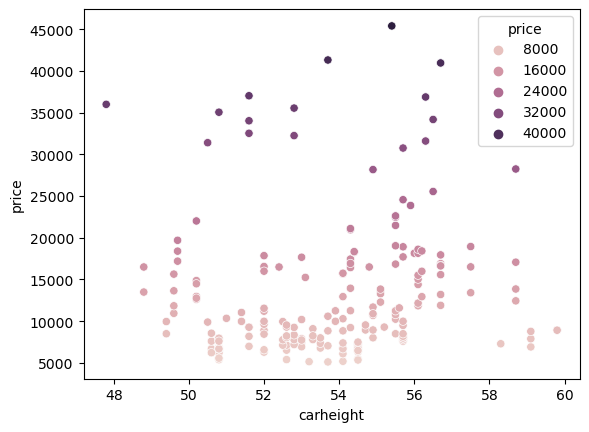

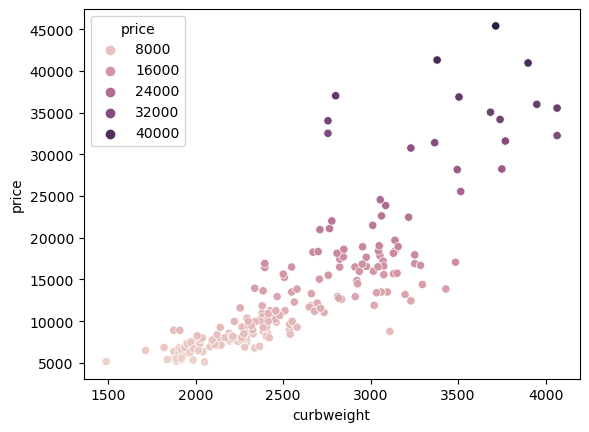

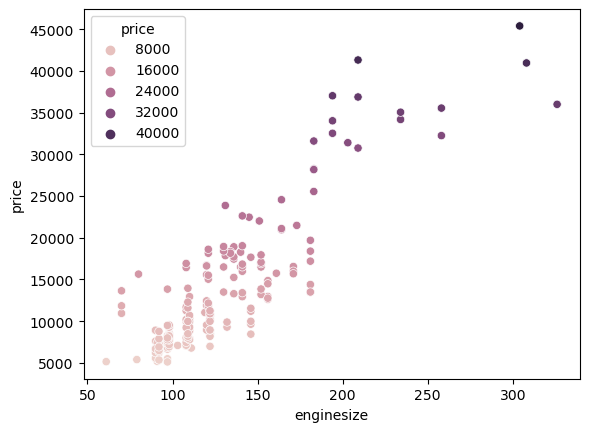

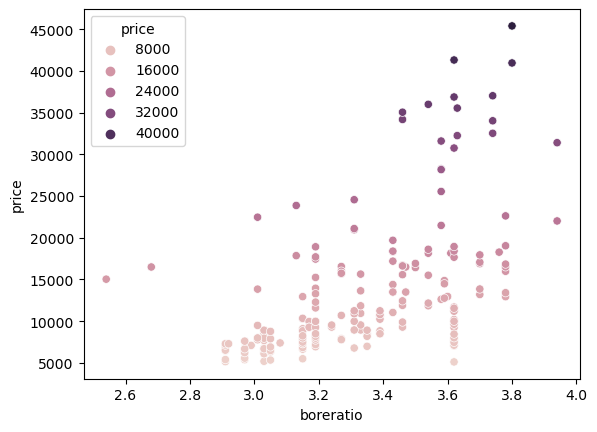

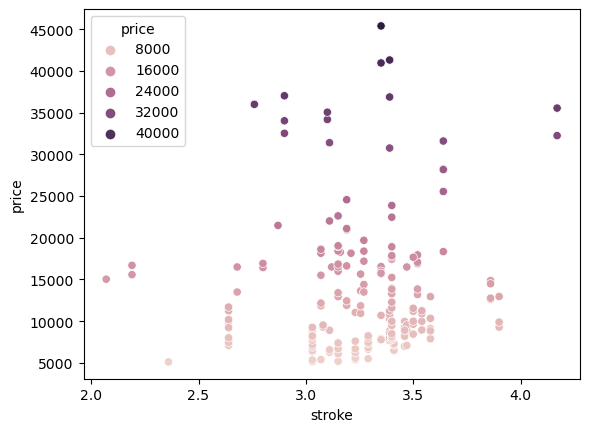

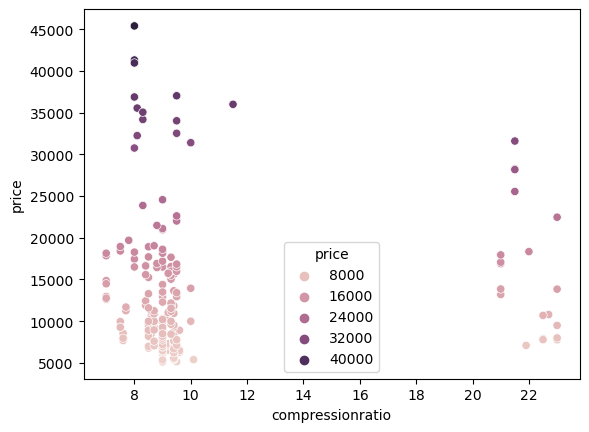

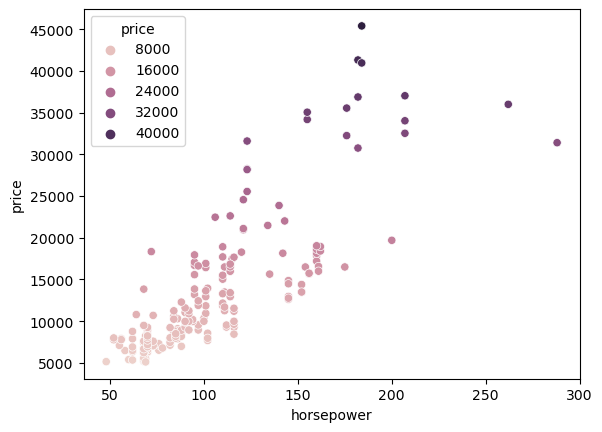

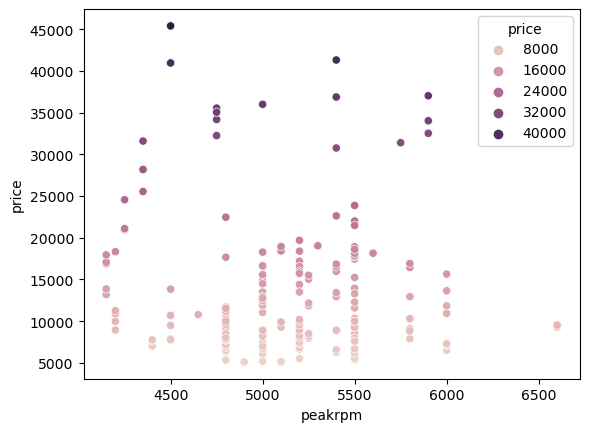

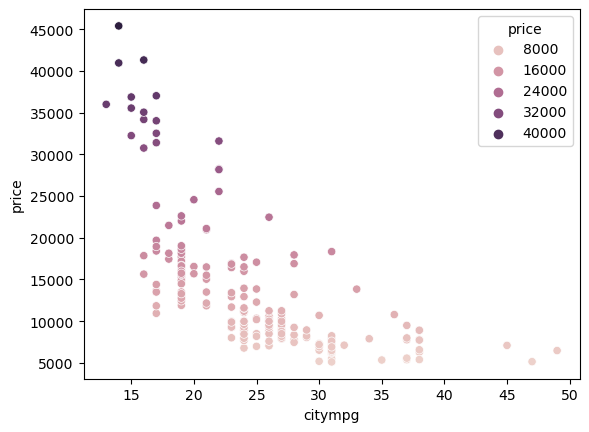

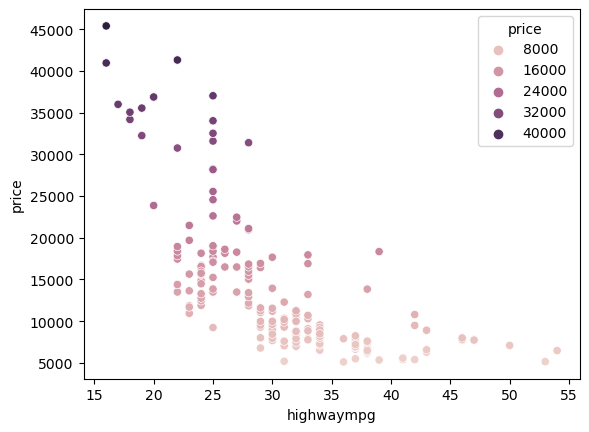

In [38]:
#Scatter Plot to understand the relationships
for i in ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']:
   sns.scatterplot(data=df,x=i,y='price',hue='price')
   plt.show()
    

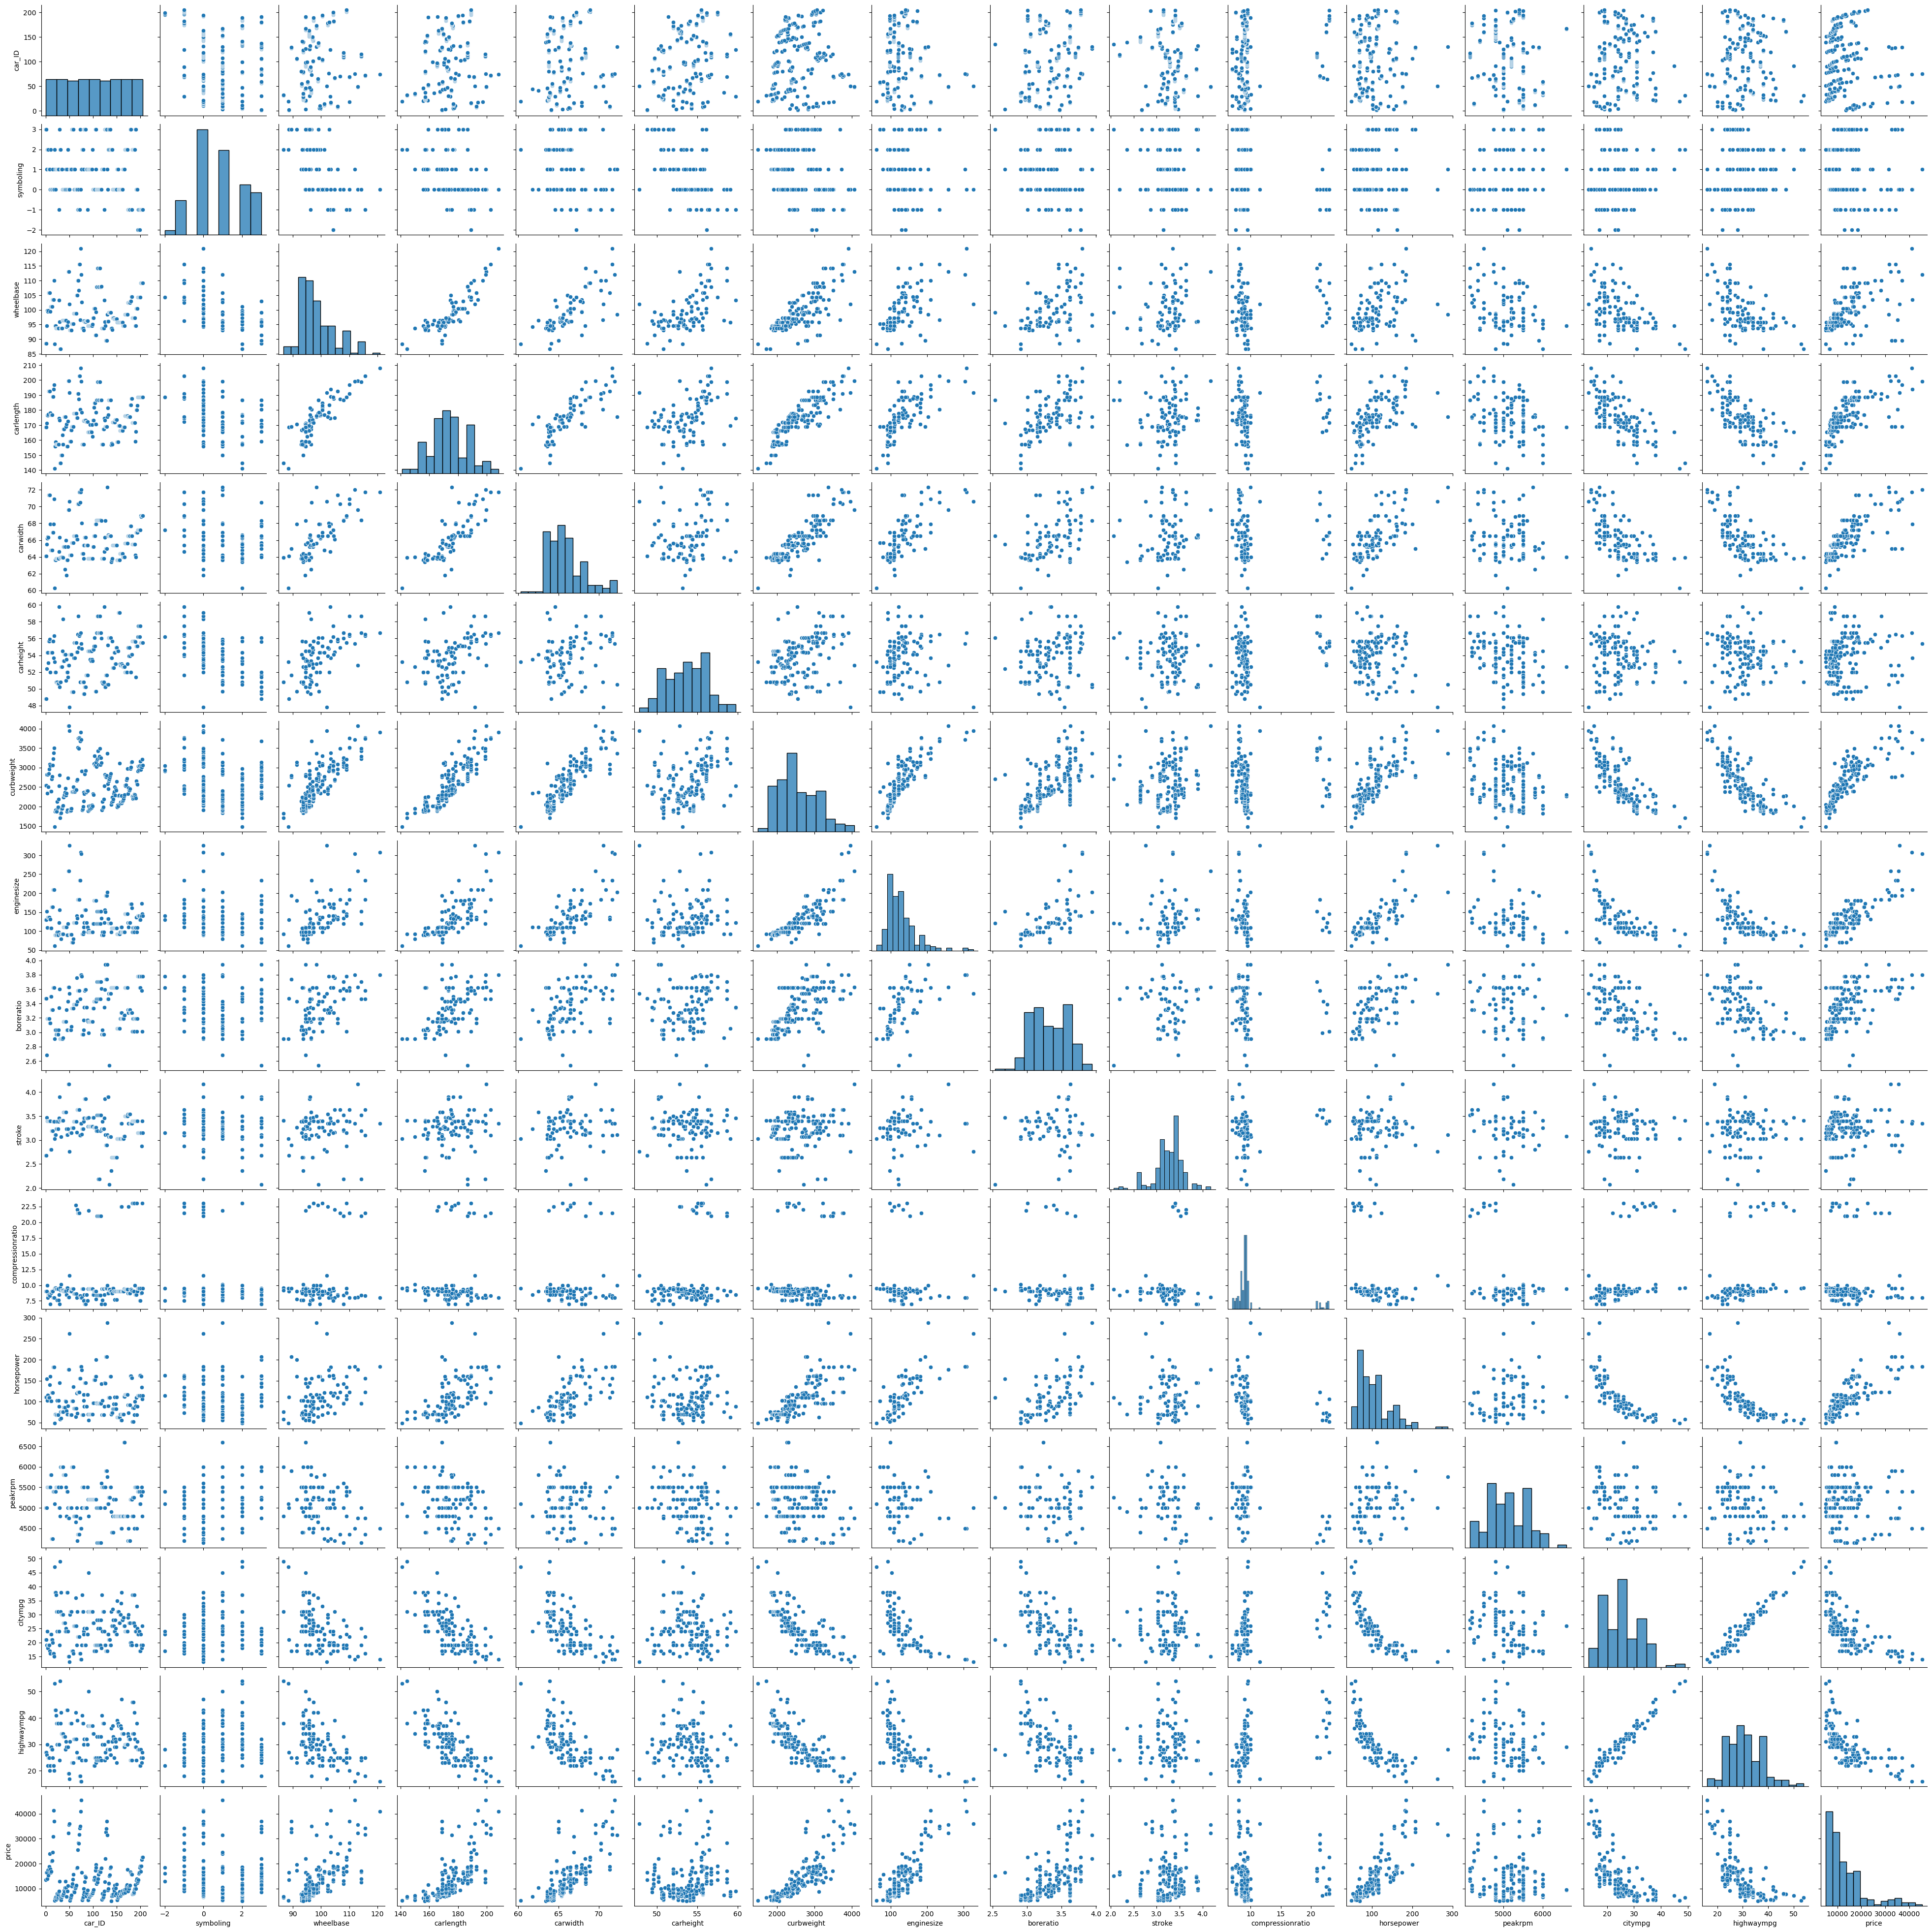

In [45]:
# Draw scatter plot for every feature
sns.pairplot(df)
plt.show()

In [44]:
df.select_dtypes(include="number").columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [27]:
#Correlation with heat map to interpret the relation
s=df.select_dtypes(include='number').corr()
s

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg           0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg        0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price            -0.109093  -0.079978   0.577816   0.682920  0.759325   

                  carheight  curbweight  enginesize  boreratio    stroke  \
car_ID             0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling         -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase          0.589435    0.776386    0.569329   0.488750  0.160959   
carlength          0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth           0.279210    0.867032    0.735433   0.559150  0.182942   
carheight          1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight         0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize         0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio          0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke            -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio   0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower        -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm           -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg           -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg        -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price              0.119336    0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.150276   -0.015006 -0.203789  0.015940   
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
car_ID              0.011255 -0.109093  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbwei

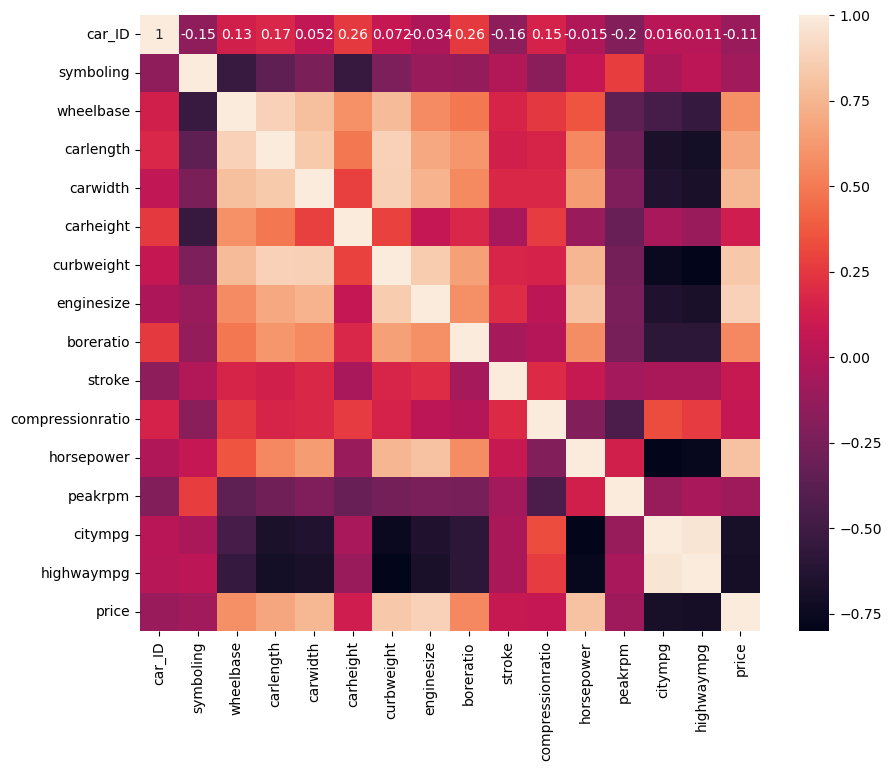

In [28]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(s,annot=True)
plt.show()

# EDA Completed

# Step:5 -  Missing Value Treatments

# Choose the methodes of imputing missing values 3
# Mean, Median , Mode , KNNImputer
 
No missing values ,duplicates found

In [29]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Brand               0
Model               0
dtype: int64

In [30]:
df.shape

(205, 28)

# Step : 6- Outliers treatment


#### IQR


In [38]:
# Function to get outliers using IQR method and filter out outliers or trim
def get_IQR_outliers(df, column, filter=False):
    if column not in df.columns:               # Check if the column exists in the DataFrame
        raise ValueError(f"Column '{column}' is not in DataFrame and the DataFrame columns are :{df.columns}")

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_mask =  (df[column] < lower_bound) | (df[column] > upper_bound)
    if filter:                    # if the filter is true
        return df[~outliers_mask] # return outlier filtered dataframe
    else:                         # if the filter is false
        return df[outliers_mask]  # return dataframe of outliers




# Zscore

In [39]:
# Function to get outliers using Zscore method and filter out outliers or trim
def get_zscore_outliers(df, column, threshold=3, filter=False):
    if column not in df.columns:               # Check if the column exists in the DataFrame
        raise ValueError(f"Column '{column}' is not in DataFrame and the DataFrame columns are :{df.columns}")

    x = df[column]                             # Extract the specified column from the DataFrame
    mean = x.mean()                            # Calculate the mean of the column
    standard_deviation = x.std()               # Calculate the standard deviation of the column
    z_scores = (x - mean) / standard_deviation # Calculate Z-scores for each value in the column
    outliers_mask = ((z_scores < -1* threshold) | (z_scores > threshold))
    if filter:                                 # if filter is True
        return df[~outliers_mask]              # return outlier filtered dataframe
    else:                                      # if filter is false
        return df[outliers_mask]               # return outlier dataframe

# Outlier treatment of each column in the data set using for group.

Trim outliers with IQR method on columns person_age, person_income, and person_emp_length because we found unrealistic impossible data

In [40]:
tdf = df.copy()
columns = ['wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'] 
for column in columns:
    print(f"Outliers in {column} : {len(get_IQR_outliers(df=tdf, column=column, filter=False))}")
    tdf = get_IQR_outliers(df=tdf, column=column, filter=True)
    print(f"Shape after trimming {tdf.shape}")
tdf.shape

Outliers in wheelbase : 3
Shape after trimming (202, 28)
Outliers in carlength : 1
Shape after trimming (201, 28)
Outliers in carwidth : 11
Shape after trimming (190, 28)
Outliers in carheight : 0
Shape after trimming (190, 28)
Outliers in curbweight : 2
Shape after trimming (188, 28)
Outliers in enginesize : 2
Shape after trimming (186, 28)
Outliers in boreratio : 0
Shape after trimming (186, 28)
Outliers in stroke : 22
Shape after trimming (164, 28)
Outliers in compressionratio : 28
Shape after trimming (136, 28)
Outliers in horsepower : 3
Shape after trimming (133, 28)
Outliers in peakrpm : 6
Shape after trimming (127, 28)
Outliers in citympg : 1
Shape after trimming (126, 28)
Outliers in highwaympg : 0
Shape after trimming (126, 28)


(126, 28)

In [41]:
tdf.shape                                                     # outlier trimmed dataframe


(126, 28)

Outliersv are removed successfully using IQR methode

# Visualization after outlier trim and dropping duplicates

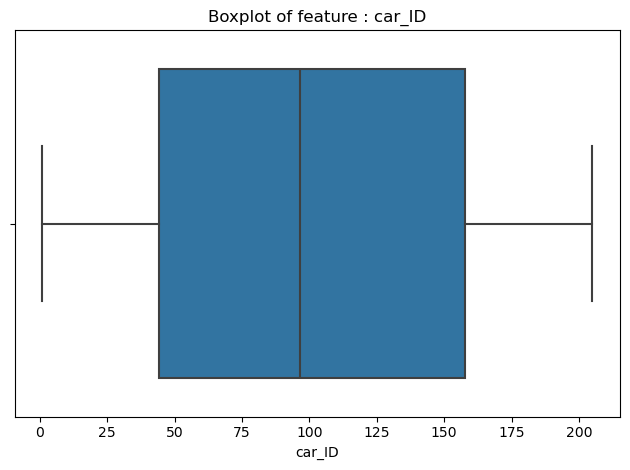

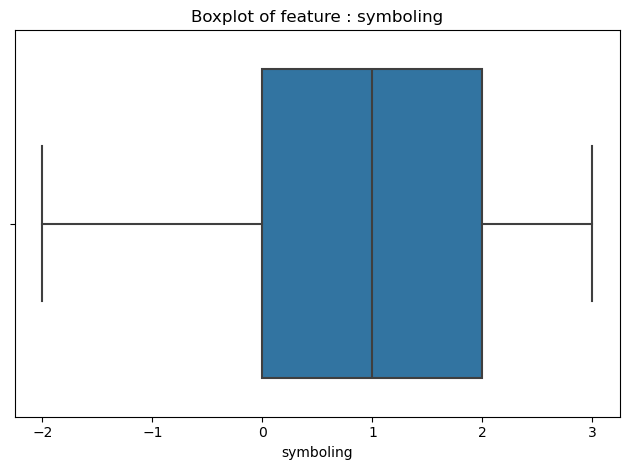

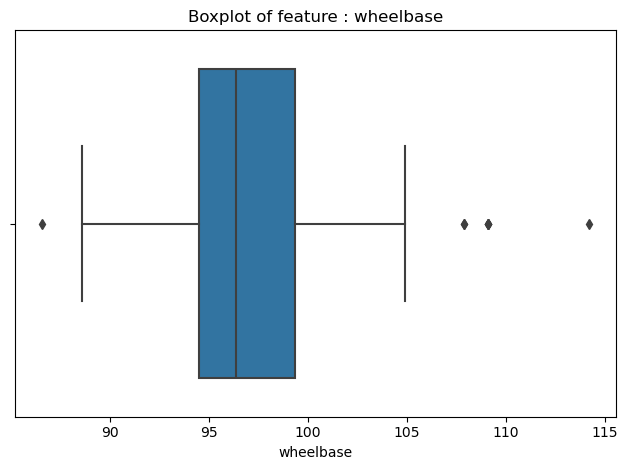

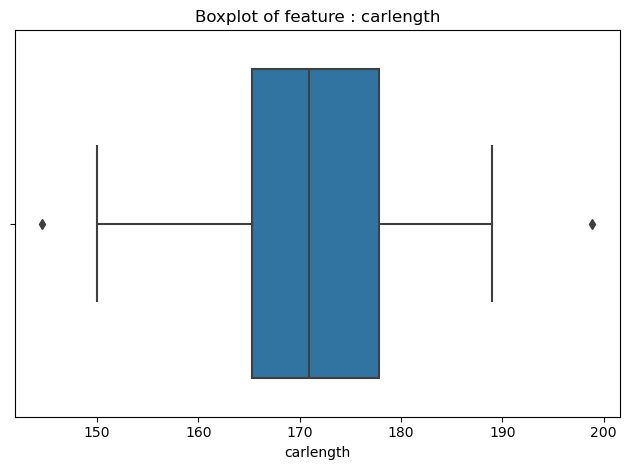

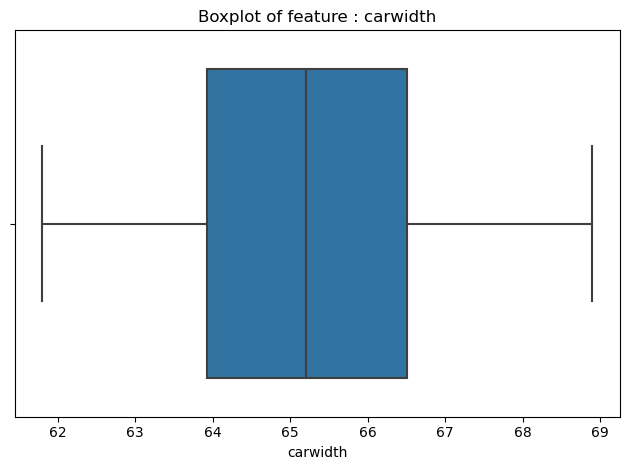

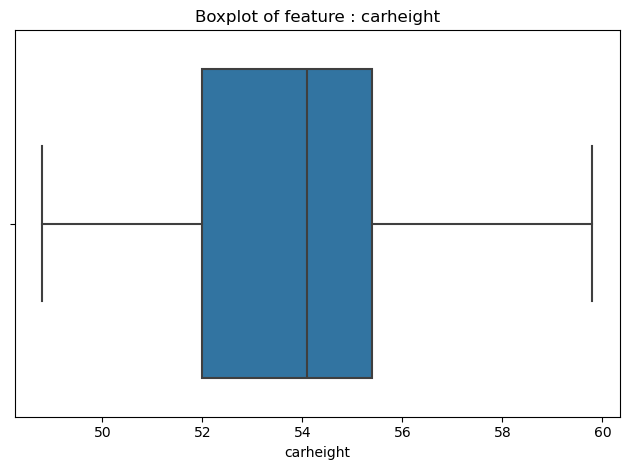

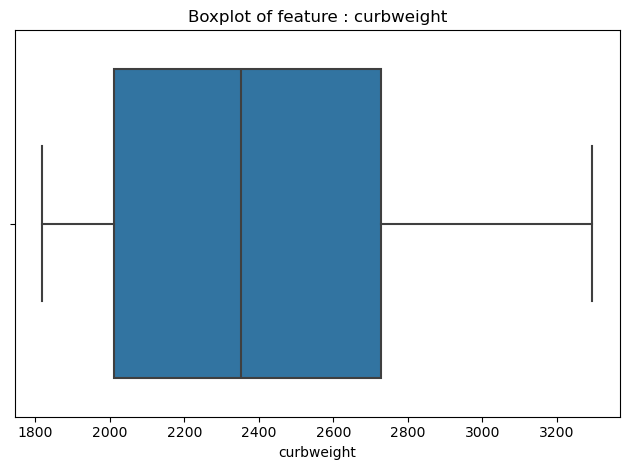

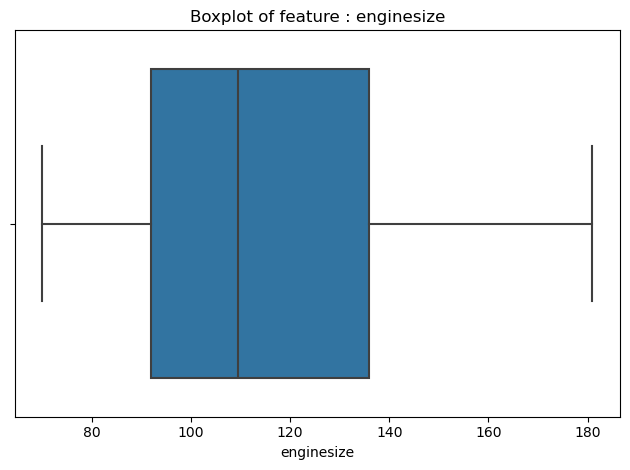

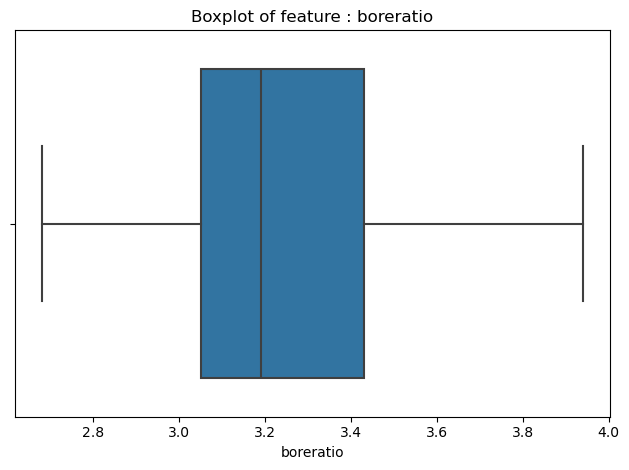

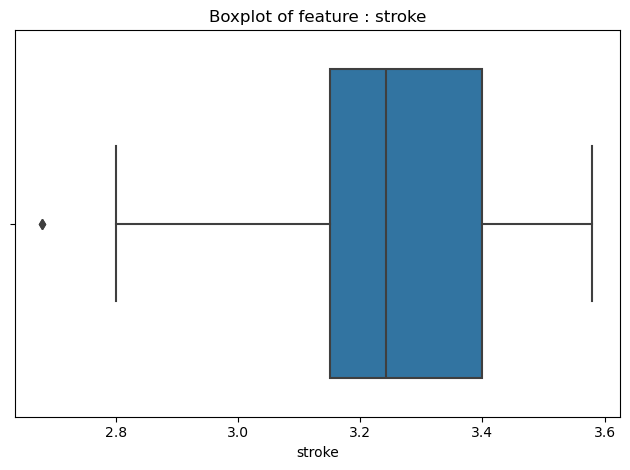

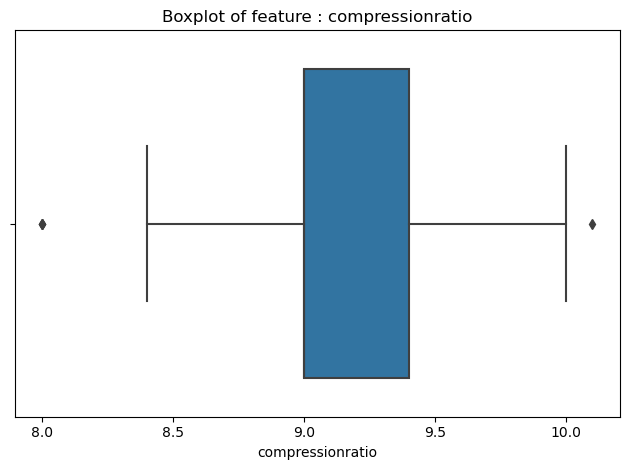

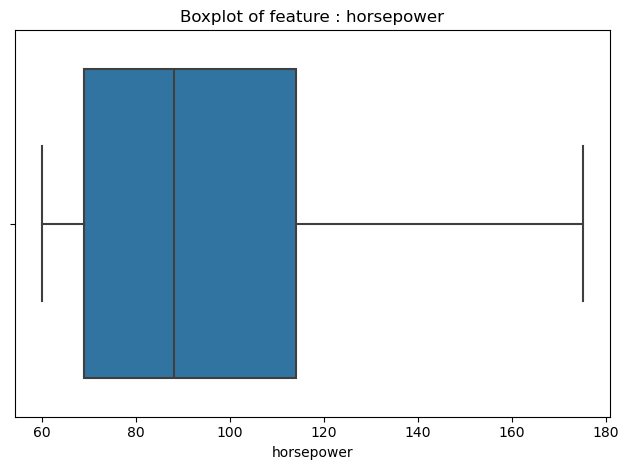

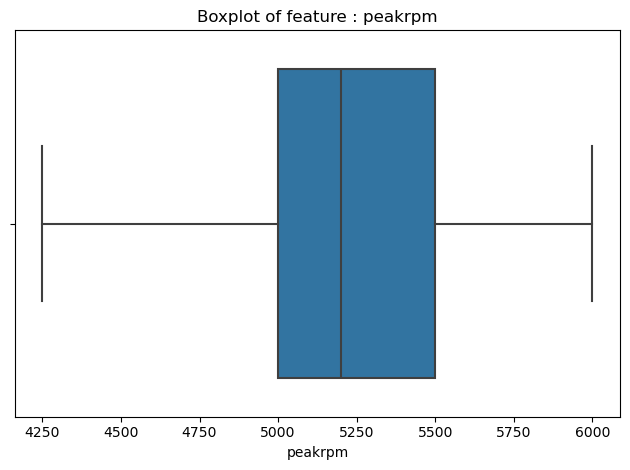

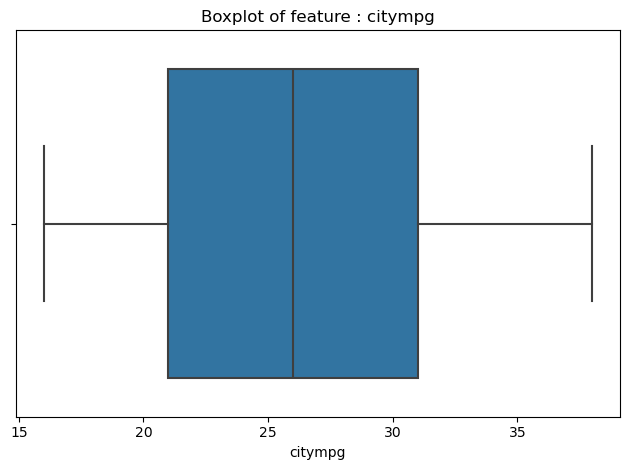

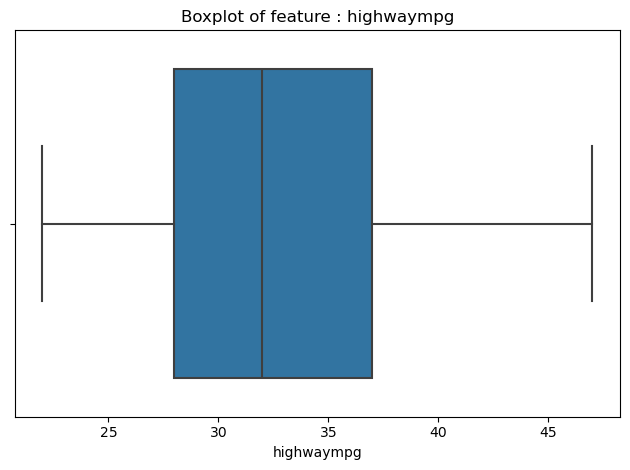

In [42]:
# Outlier detection using boxplot after outlier trim and dropping duplicates
for column in tdf.select_dtypes(include="number").columns:
    if column == "price":
        continue
    sns.boxplot(data=tdf, x=column)
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

#Almost outliers are removed from the columns

In [43]:
tdf.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean    99.817460    0.936508   97.554762  171.507937   65.271429   53.657143   
std     62.024434    1.184878    4.539967   10.699769    1.534607    2.420725   
min      1.000000   -2.000000   86.600000  144.600000   61.800000   48.800000   
25%     44.250000    0.000000   94.500000  165.300000   63.925000   52.000000   
50%     96.500000    1.000000   96.400000  170.950000   65.200000   54.100000   
75%    157.750000    2.000000   99.350000  177.800000   66.500000   55.400000   
max    205.000000    3.000000  114.200000  198.900000   68.900000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   126.000000  126.000000  126.000000  126.000000        126.000000   
mean   2406.634921  115.952381    3.269127    3.250794          9.081905   
std     412.141987   27.264000    0.250768    0.183674          0.389656   
min    1819.000000   70.000000    2.680000    2.680000          8.000000   
25%    2011.250000   92.000000    3.050000    3.150000          9.000000   
50%    2351.000000  109.500000    3.190000    3.242500          9.000000   
75%    2729.000000  136.000000    3.430000    3.400000          9.400000   
max    3296.000000  181.000000    3.940000    3.580000         10.100000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  126.000000   126.000000  126.000000  126.000000    126.000000  
mean    95.460317  5239.285714   25.928571   31.777778  10945.230159  
std     29.522236   382.811031    5.669820    5.746497   4586.023107  
min     60.000000  4250.000000   16.000000   22.000000   5195.000000  
25%     69.000000  5000.000000   21.000000   28.000000   7295.000000  
50%     88.000000  5200.000000   26.000000   32.000000   9022.000000  
75%    114.000000  5500.000000   31.000000   37.000000  13873.750000  
max    175.000000  6000.000000   38.000000   47.000000  24565.000000

In [44]:
tdf.shape

(126, 28)

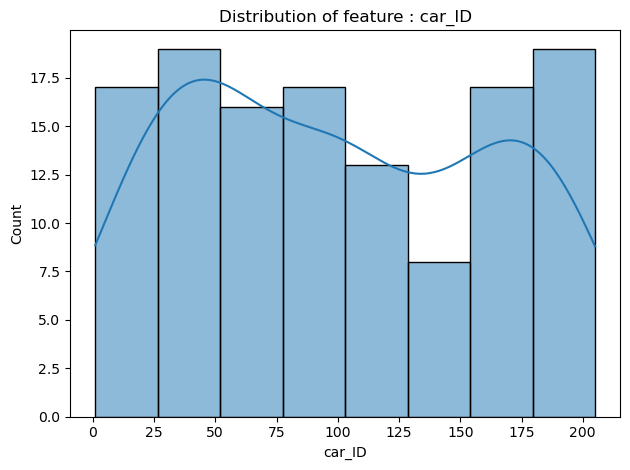

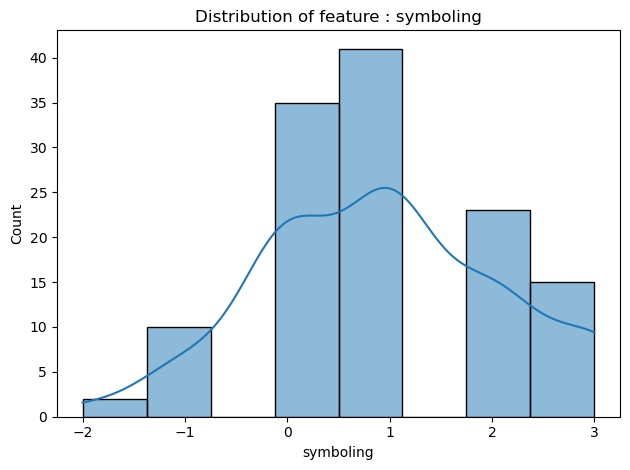

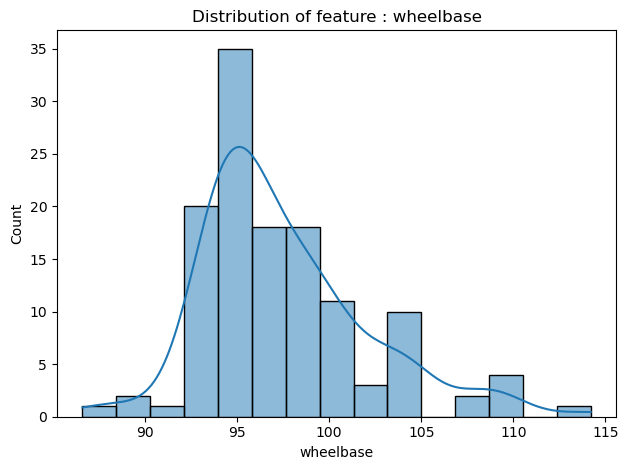

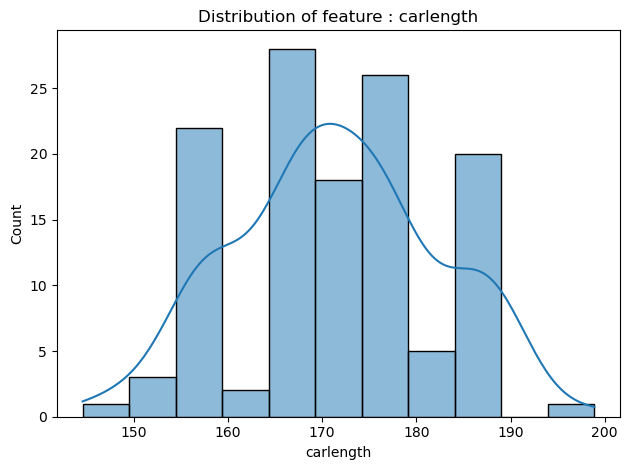

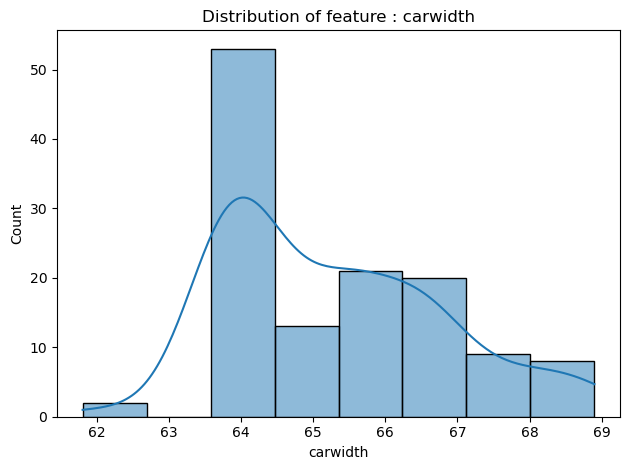

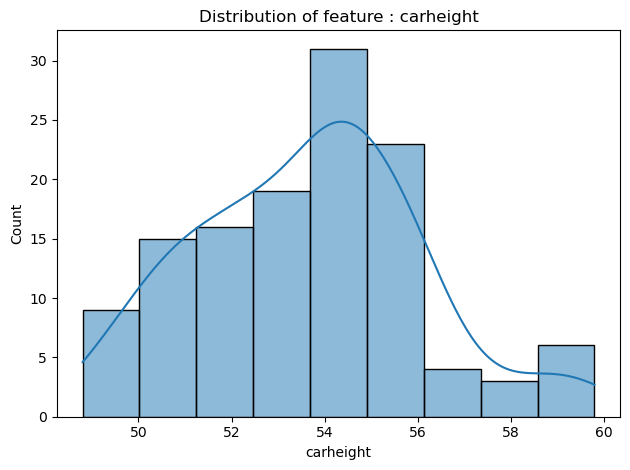

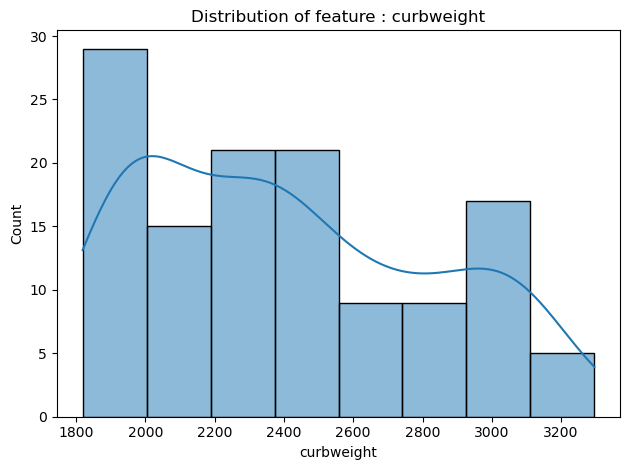

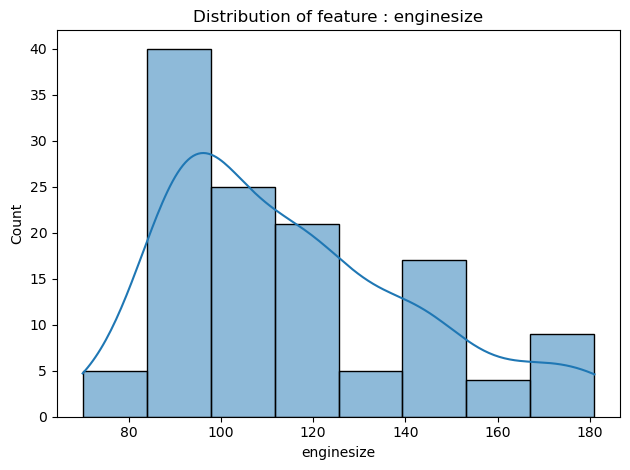

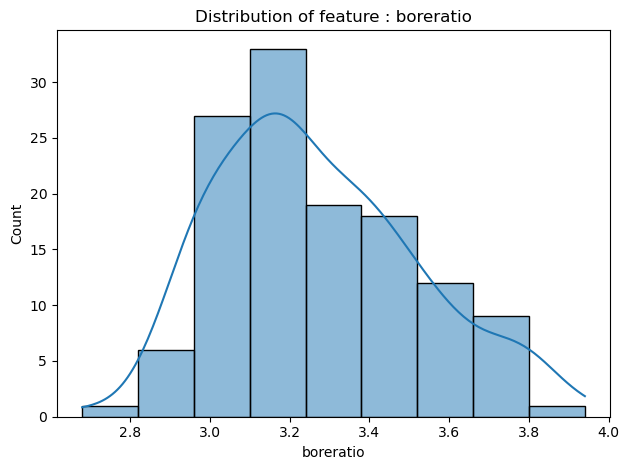

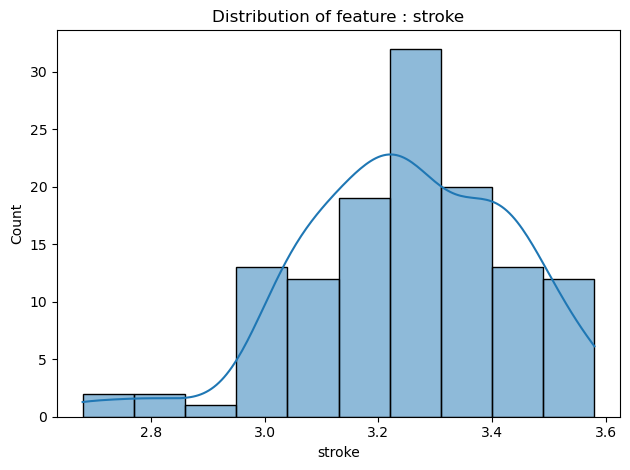

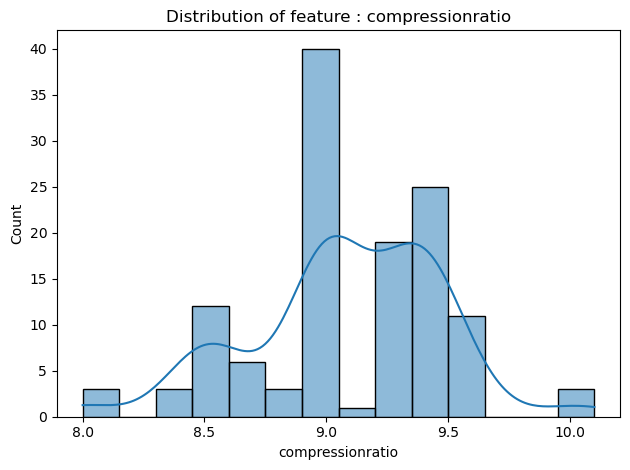

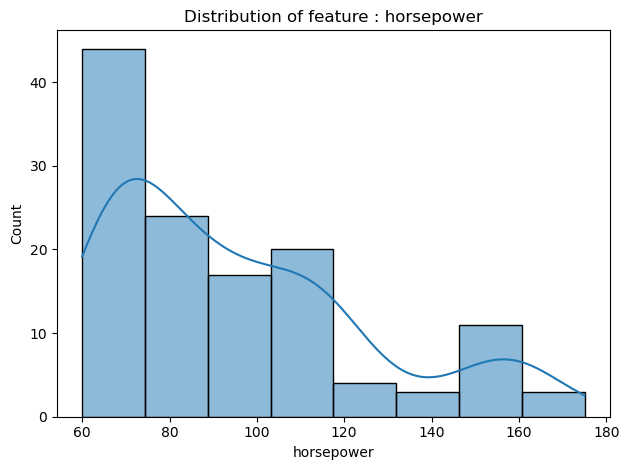

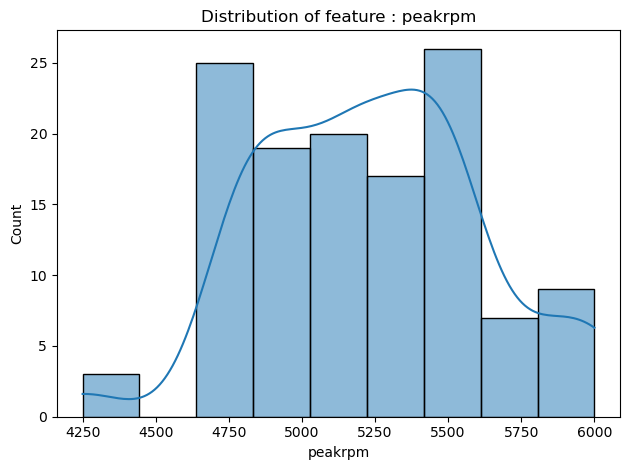

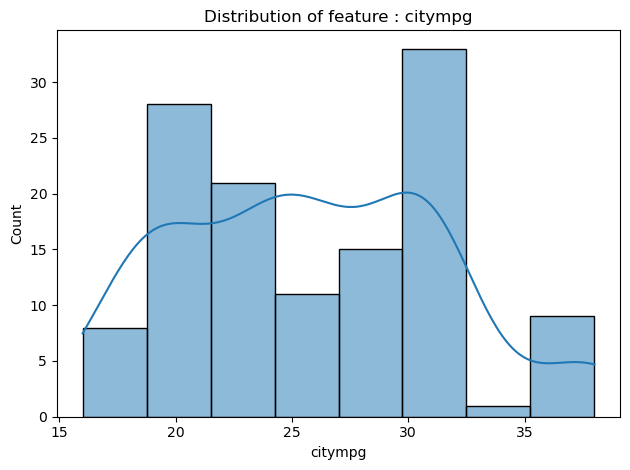

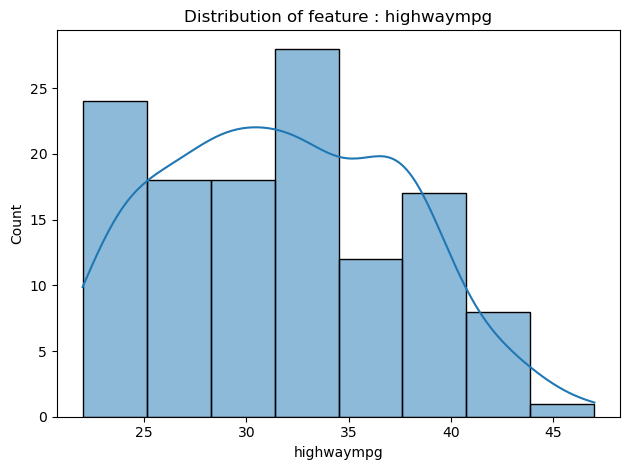

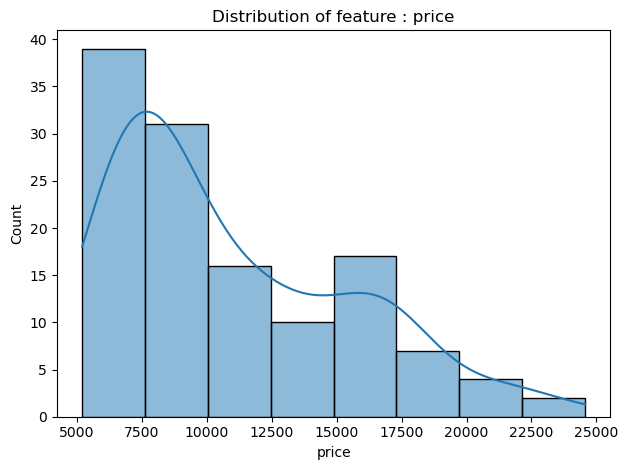

In [45]:
# draw histplot for every numerical column to see distrubution of data after outlier trim dropping duplicates
for column in tdf.select_dtypes(include="number").columns:
    sns.histplot(data=tdf, x=column, kde=True)
    plt.title(f"Distribution of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

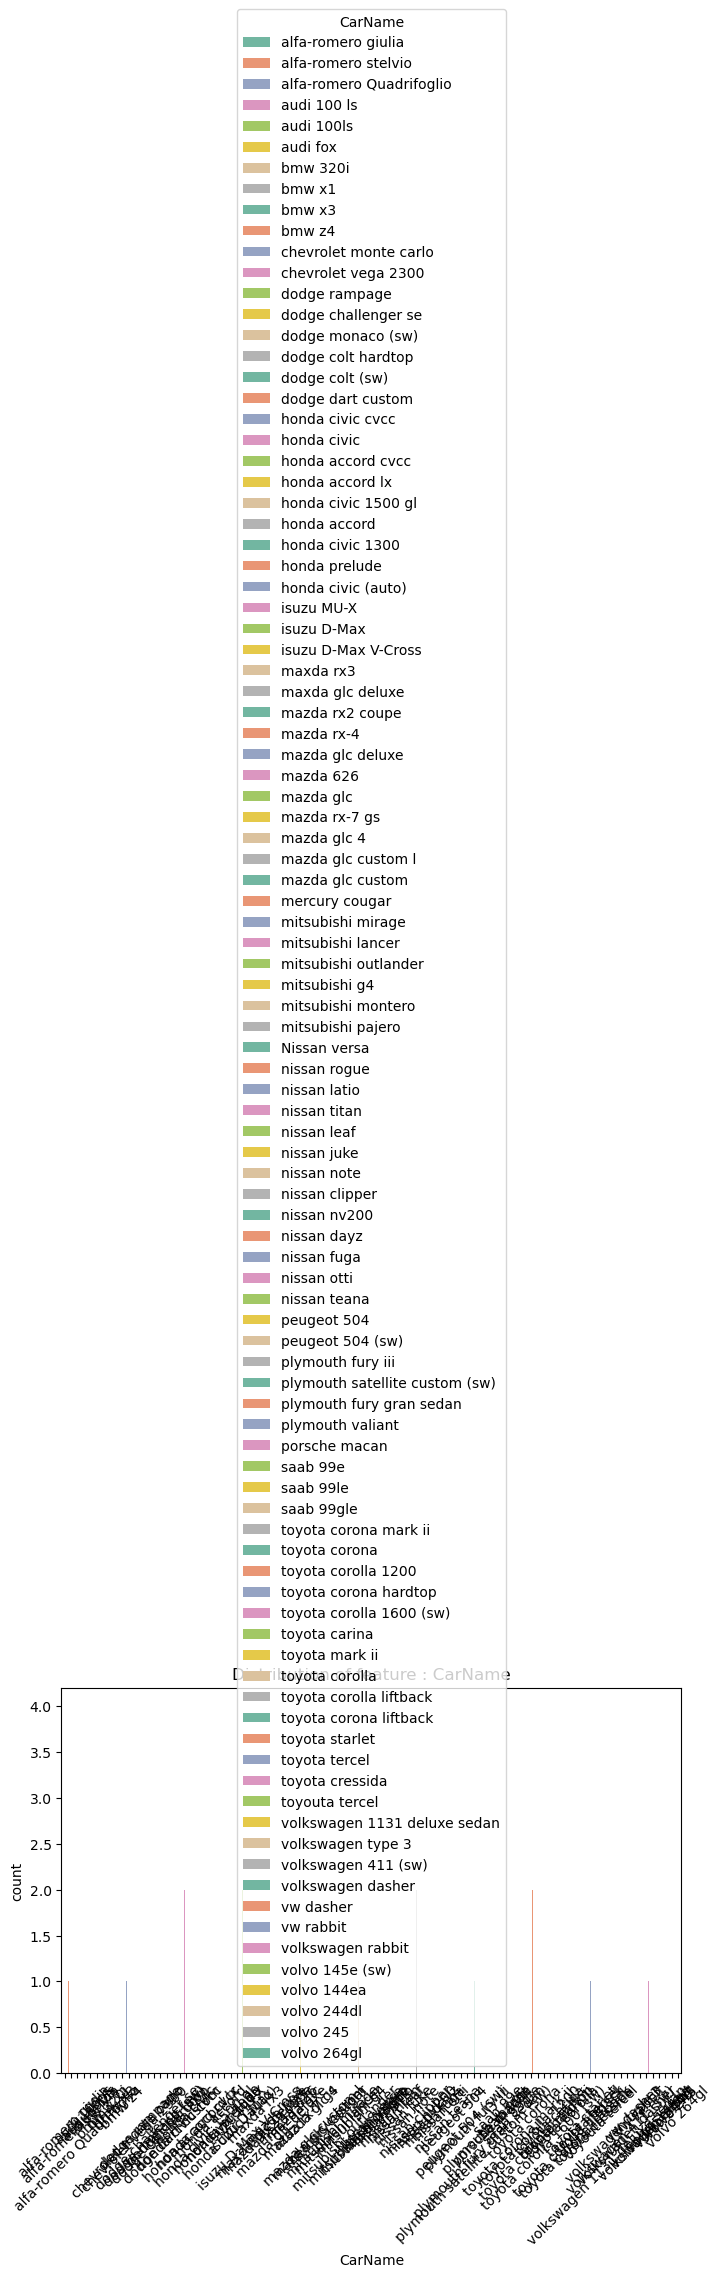

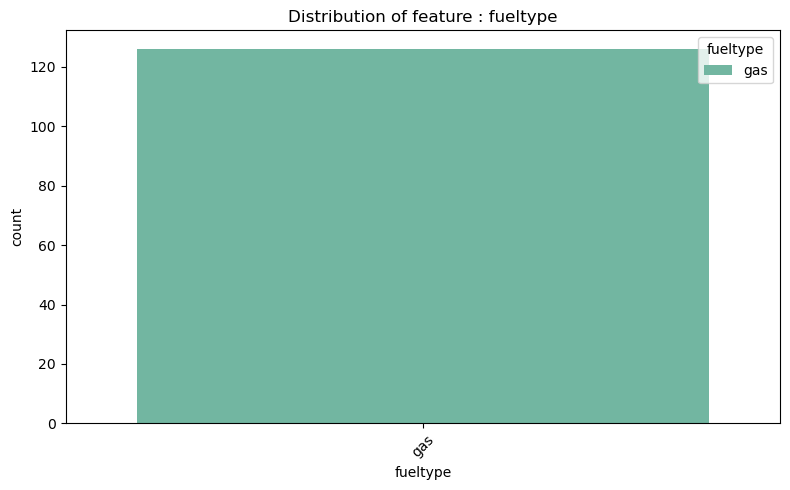

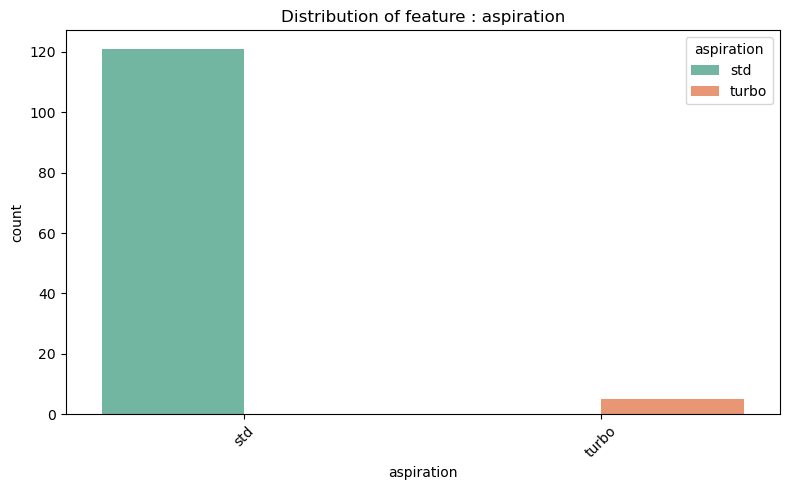

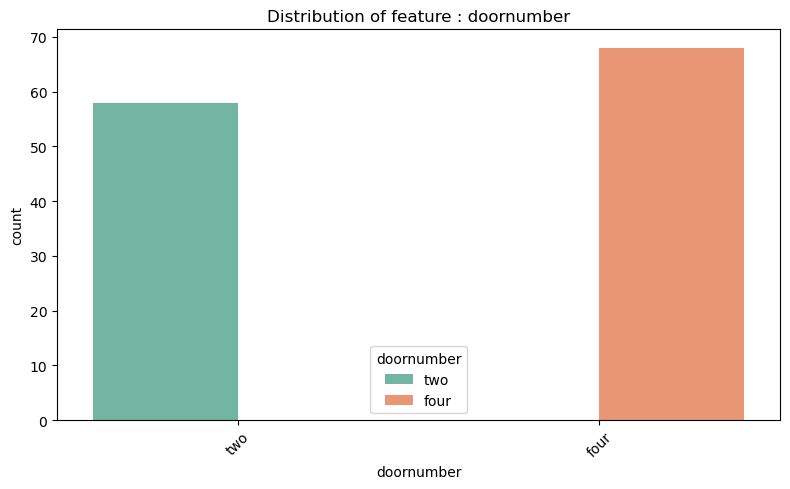

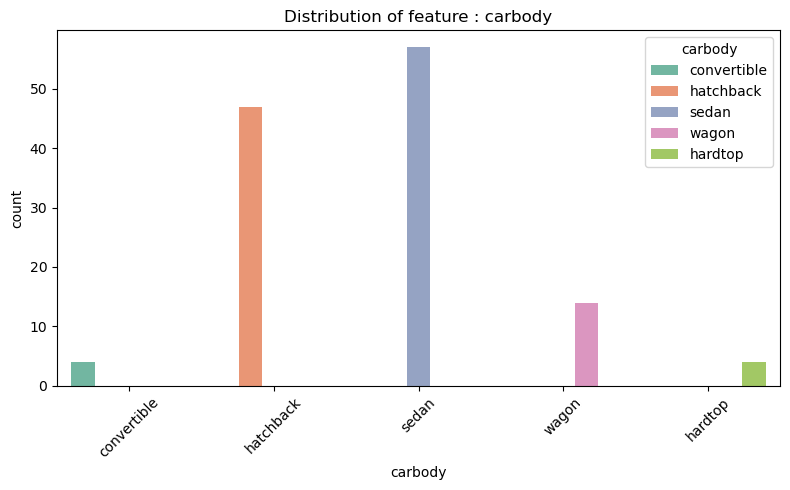

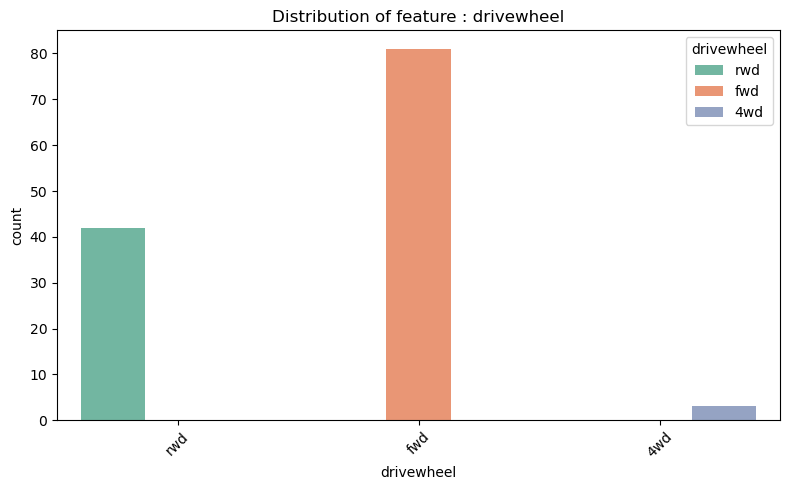

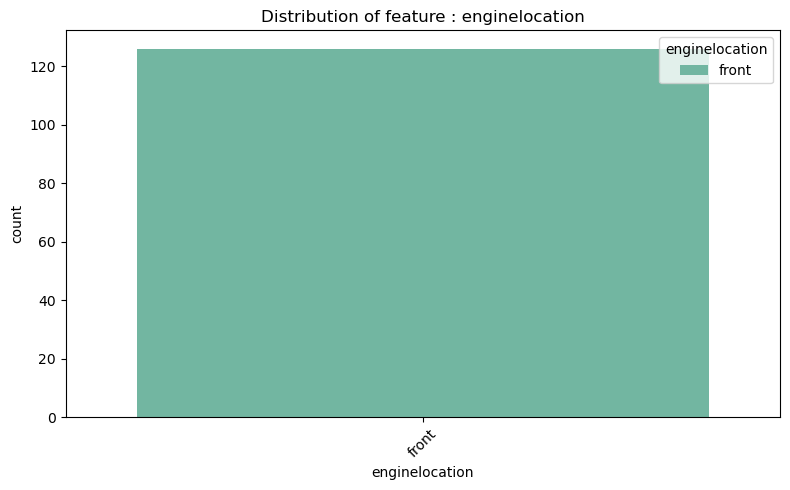

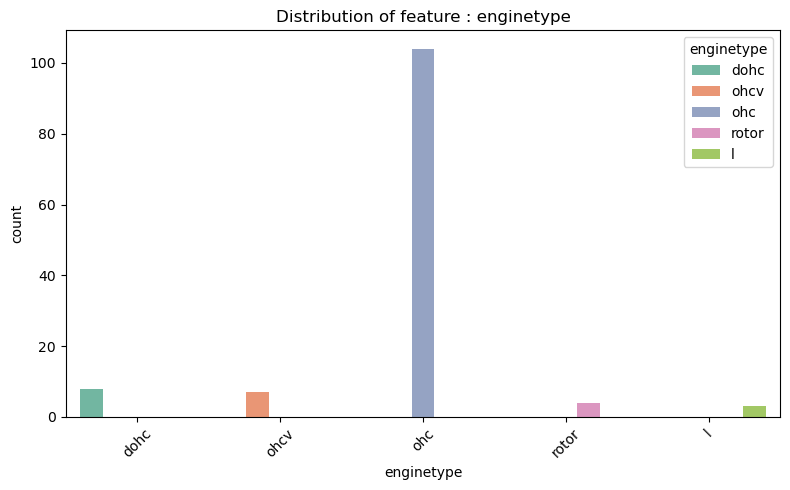

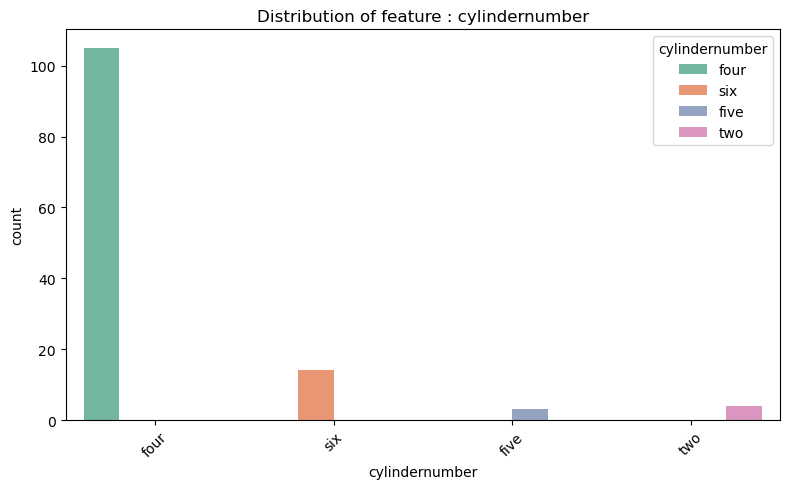

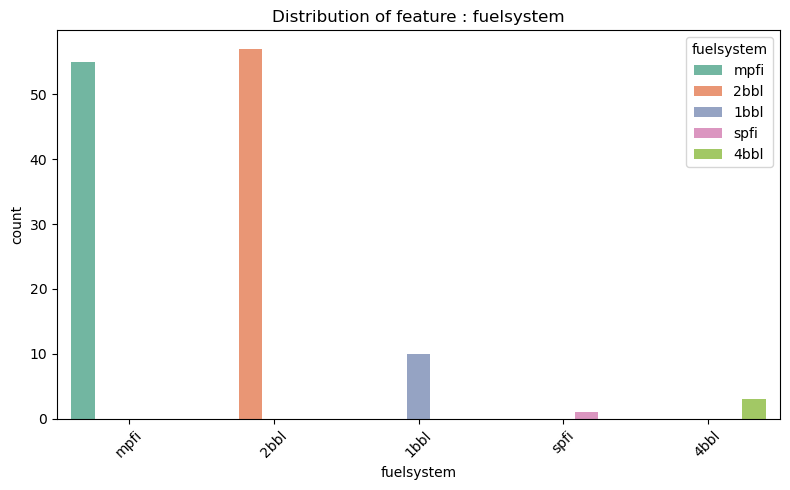

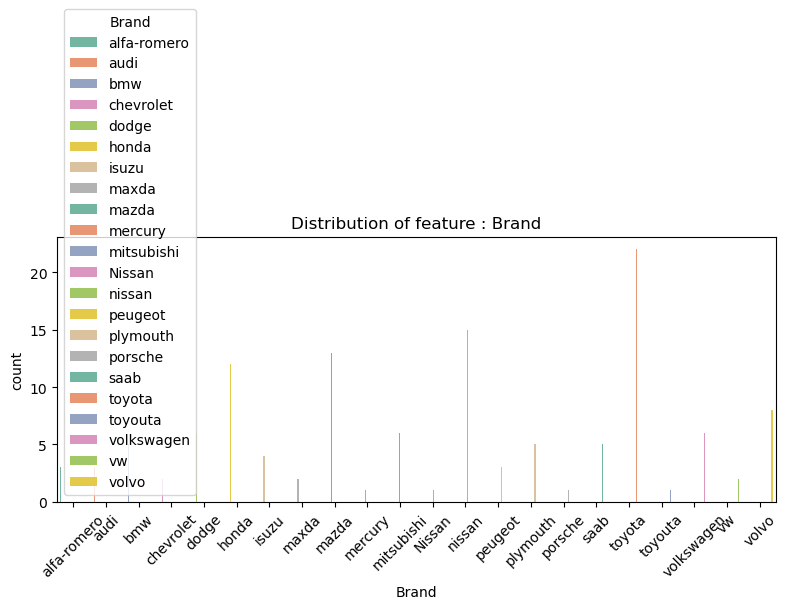

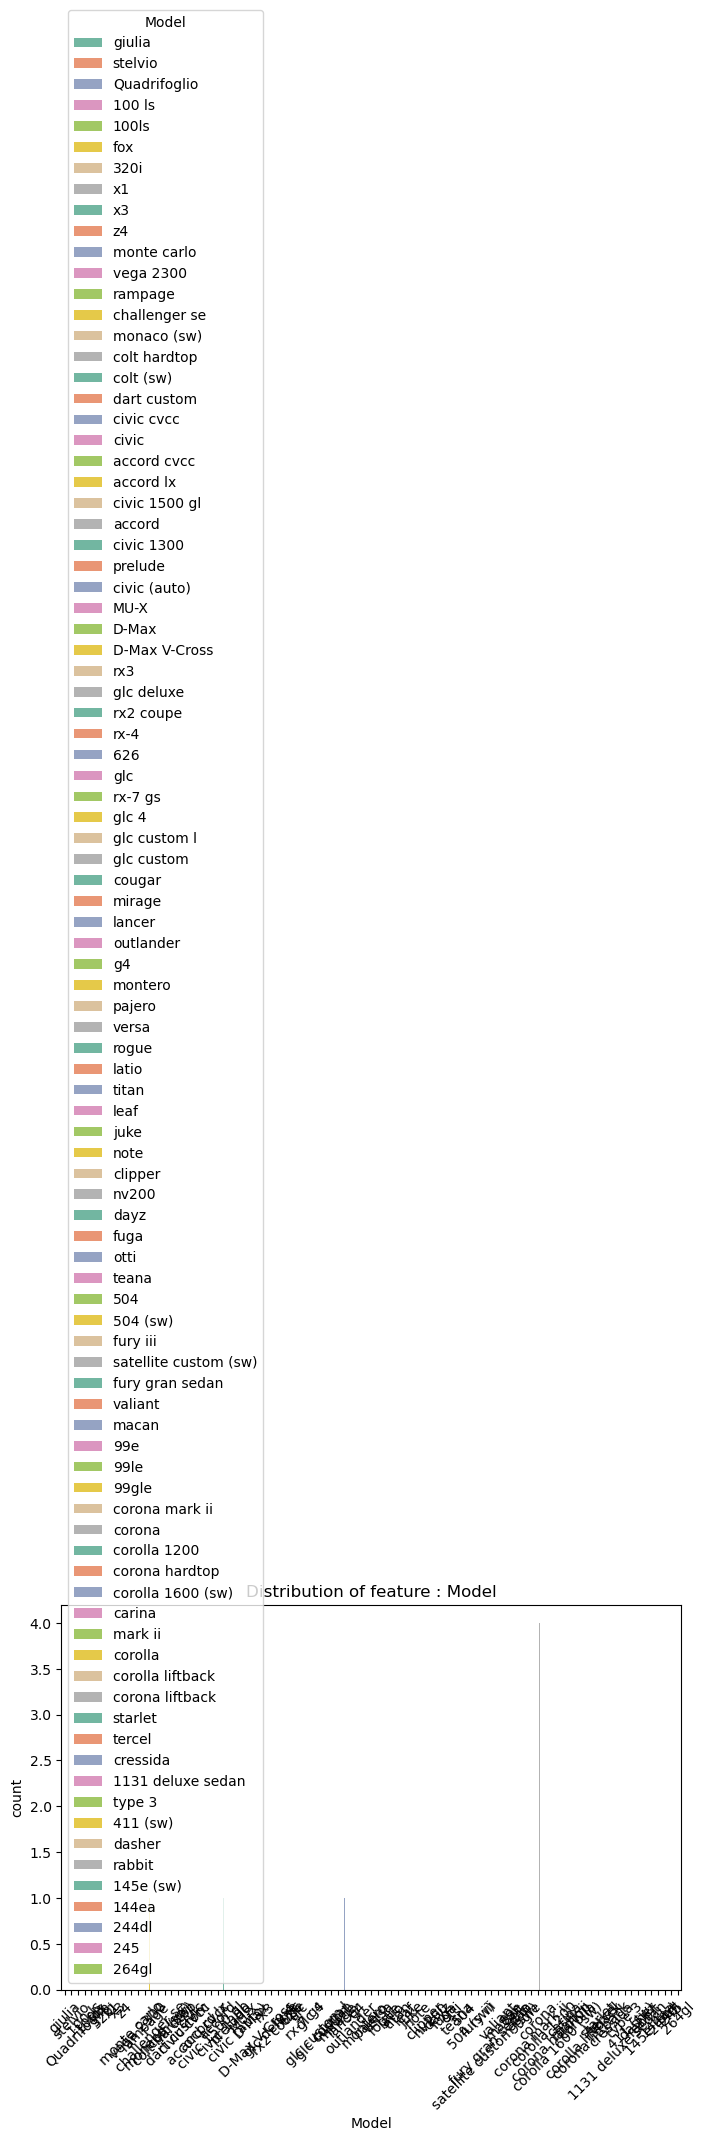

In [46]:
wr.filterwarnings("ignore")

#draw count plot to see distribution of categorical data after outlier trim and dropping duplicates
for column in tdf.select_dtypes(include="object").columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=tdf, x=column, hue = column, palette="Set2")
    plt.title(f"Distribution of feature : {column}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\n")

# Encoding

In [47]:
tdf.reset_index(drop=True, inplace=True) # reset df index

In [63]:
tdf.drop(columns=['CarName'], inplace=True)

tdf.info() # show data types of columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            126 non-null    int64  
 1   symboling         126 non-null    int64  
 2   fueltype          126 non-null    object 
 3   aspiration        126 non-null    object 
 4   doornumber        126 non-null    object 
 5   carbody           126 non-null    object 
 6   drivewheel        126 non-null    object 
 7   enginelocation    126 non-null    object 
 8   wheelbase         126 non-null    float64
 9   carlength         126 non-null    float64
 10  carwidth          126 non-null    float64
 11  carheight         126 non-null    float64
 12  curbweight        126 non-null    int64  
 13  enginetype        126 non-null    object 
 14  cylindernumber    126 non-null    object 
 15  enginesize        126 non-null    int64  
 16  fuelsystem        126 non-null    object 
 1

In [64]:
columns = ['Brand', 'fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber'] # define categorical columns


In [76]:
from sklearn.preprocessing import OneHotEncoder


# Instantiate the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap

# Fit and transform the categorical columns
encoded_features = encoder.fit_transform(tdf[['Brand', 'fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber']])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Brand', 'fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber']))

# Combine with the original DataFrame (excluding original categorical columns)
df_encoded = pd.concat([tdf.drop(columns=['Brand', 'fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','enginelocation','fuelsystem','Model']), encoded_df], axis=1)

print(df_encoded)
df_encoded.info()
df_encoded.shape

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
121     198         -1      104.3      188.8      67.2       57.5        3042   
122     201         -1      109.1      188.8      68.9       55.5        2952   
123     202         -1      109.1      188.8      68.8       55.5        3049   
124     203         -1      109.1      188.8      68.9       55.5        3012   
125     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio 

(126, 52)

# Using Random Forest for Feature Selection

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Use feature importance to select the best features
selector = SelectFromModel(model, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Check selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# You can now proceed to train a model with the selected features
model.fit(X_train_selected, y_train)


Selected Features: Index(['car_ID', 'carwidth', 'curbweight', 'horsepower', 'citympg',
       'highwaympg'],
      dtype='object')


RandomForestRegressor(random_state=42)

# Scaling

In [83]:
from sklearn.preprocessing import StandardScaler


# Scale the selected features using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)



# Train the model

2. Model Implementation (10 marks)
 Implement the following five regression algorithms:
1) Linear Regression
2) Decision Tree Regressor
3) Random Forest Regressor
4) Gradient Boosting Regressor
5) Support Vector Regressor


1) Linear Regression


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Linear Regression Model
model = LinearRegression()

# Train the Model
model.fit(X_train, y_train)

#Make Predictions
y_pred = model.predict(X_test)

#Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 8: Print Evaluation Metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 1527.606149118941
Mean Squared Error: 4373384.717010274
R^2 Score: 0.7391103703246156


2) Decision Tree Regressor


In [96]:
# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Step 10: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 11: Print Evaluation Metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Absolute Error: 1527.606149118941
Mean Squared Error: 4373384.717010274
R^2 Score: 0.7391103703246156


3) Random Forest Regressor


In [97]:
#Train the model
pipeline.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = pipeline.predict(X_test)

# Step 10: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 11: Print Evaluation Metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 1527.606149118941
Mean Squared Error: 4373384.717010274
R^2 Score: 0.7391103703246156


4) Gradient Boosting Regressor


In [98]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Create and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#  Print evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 1296.4570067112768
Mean Squared Error: 3822509.75372261
R^2 Score: 0.7719722323534854


5) Support Vector Regressor


In [100]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#Create and train the Support Vector Regressor
model = SVR(kernel='rbf')  # You can change the kernel if needed
model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred = model.predict(X_test)

# Step 3: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 4: Print evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Absolute Error: 3065.0616324723574
Mean Squared Error: 16865176.103187226
R^2 Score: -0.006074204004294259


# 3. Model Evaluation (5 marks)
Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).
Identify the best performing model and justify why it is the best.


In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Decision Tree Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest Regressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

# Gradient Boosting Regressor
boosting_model = GradientBoostingRegressor()
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

# Support Vector Regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Calculate metrics for each model
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)

tree_r2 = r2_score(y_test, y_pred_tree)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_mae = mean_absolute_error(y_test, y_pred_tree)

forest_r2 = r2_score(y_test, y_pred_forest)
forest_mse = mean_squared_error(y_test, y_pred_forest)
forest_mae = mean_absolute_error(y_test, y_pred_forest)

boosting_r2 = r2_score(y_test, y_pred_boosting)
boosting_mse = mean_squared_error(y_test, y_pred_boosting)
boosting_mae = mean_absolute_error(y_test, y_pred_boosting)

svr_r2 = r2_score(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_mae = mean_absolute_error(y_test, y_pred_svr)

# Now you can create the results DataFrame as shown previously
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Vector'],
    'R^2 Score': [linear_r2, tree_r2, forest_r2, boosting_r2, svr_r2],
    'Mean Squared Error': [linear_mse, tree_mse, forest_mse, boosting_mse, svr_mse],
    'Mean Absolute Error': [linear_mae, tree_mae, forest_mae, boosting_mae, svr_mae]
}

# Create a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the results
print(results_df)


               Model  R^2 Score  Mean Squared Error  Mean Absolute Error
0  Linear Regression   0.739110        4.373385e+06          1527.606149
1      Decision Tree   0.609355        6.548513e+06          1627.576923
2      Random Forest   0.783142        3.635273e+06          1318.690192
3  Gradient Boosting   0.768975        3.872746e+06          1308.252895
4     Support Vector  -0.006074        1.686518e+07          3065.061632


# 4. Feature Importance Analysis (2 marks)
Identify the significant variables affecting car prices (feature selection)


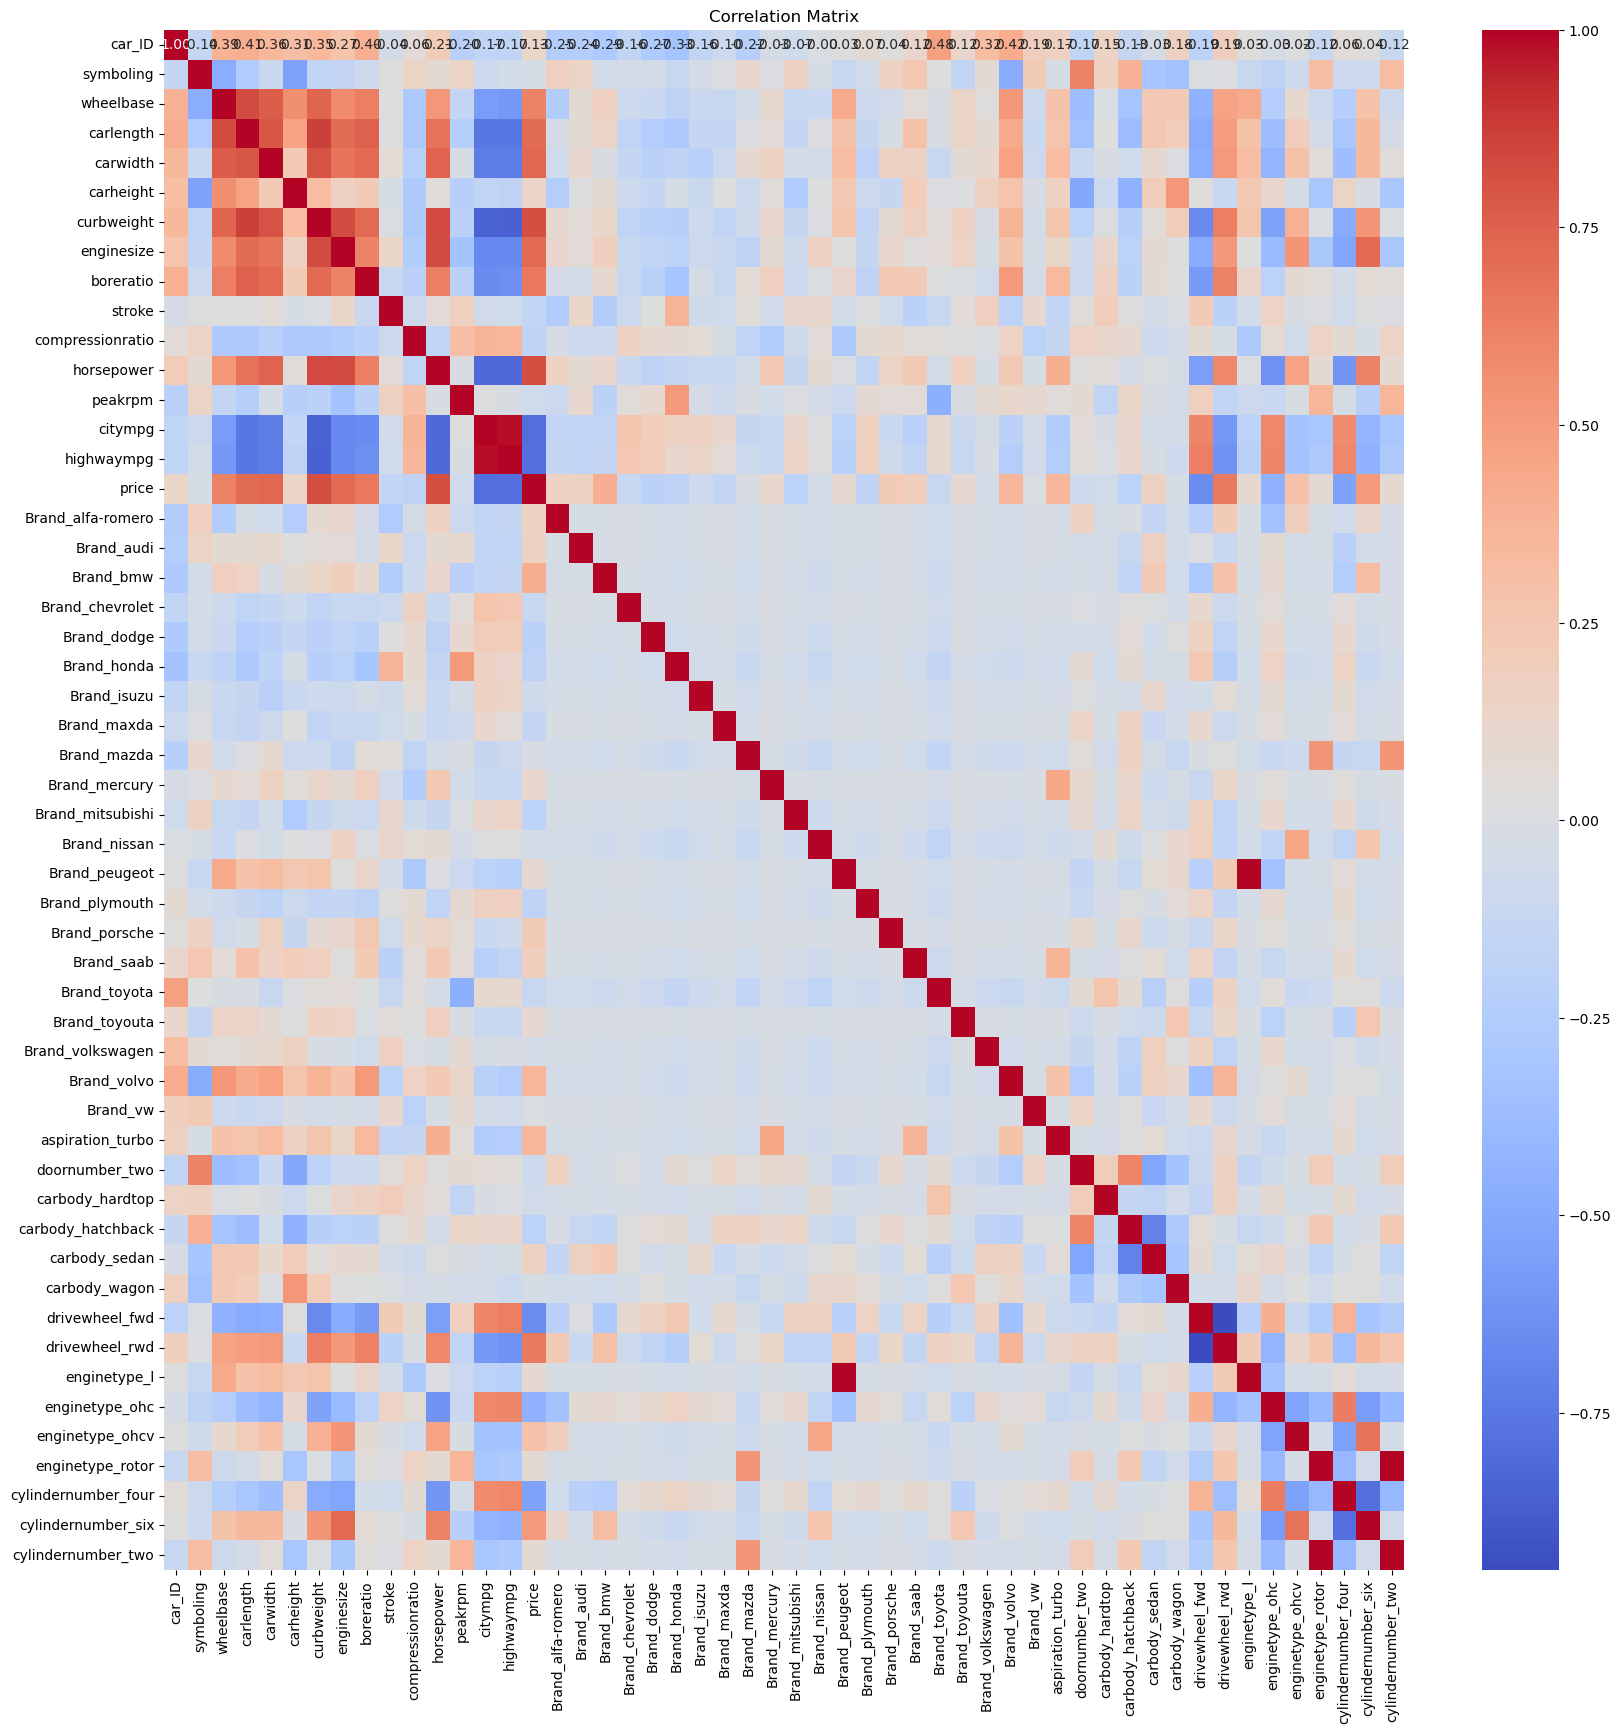

Correlations with Price:
 price                  1.000000
horsepower             0.821527
curbweight             0.818161
carwidth               0.732270
enginesize             0.724184
carlength              0.708185
boreratio              0.663667
drivewheel_rwd         0.655013
wheelbase              0.613912
cylindernumber_six     0.510754
Brand_bmw              0.402917
Brand_volvo            0.365483
aspiration_turbo       0.357952
enginetype_ohcv        0.290997
Brand_porsche          0.216818
Brand_saab             0.192019
carbody_sedan          0.168639
Brand_audi             0.157438
Brand_alfa-romero      0.155672
carheight              0.139060
car_ID                 0.128818
Brand_mercury          0.108828
Brand_toyouta          0.094083
Brand_peugeot          0.092705
enginetype_l           0.092705
enginetype_rotor       0.082246
cylindernumber_two     0.082246
Brand_vw              -0.004385
Brand_mazda           -0.009242
symboling             -0.022968
carbody_wagon 

In [107]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Display correlations with the target variable (price)
target_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("Correlations with Price:\n", target_correlations)


<Figure size 1000x600 with 0 Axes>

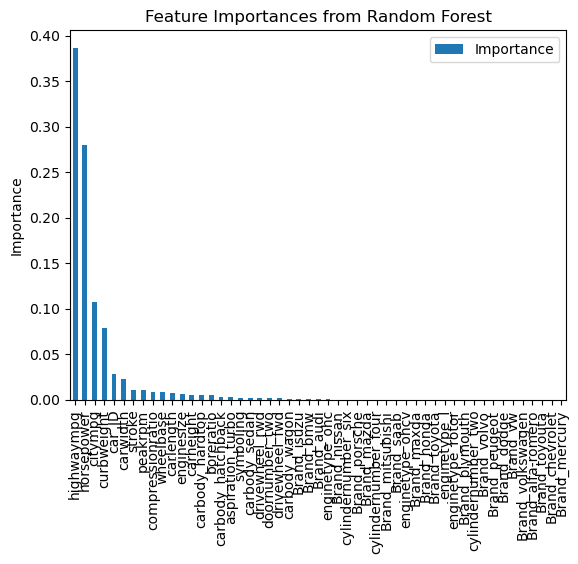

Feature Importances:
                        Importance
highwaympg           3.868178e-01
horsepower           2.805879e-01
citympg              1.078691e-01
curbweight           7.948673e-02
car_ID               2.842527e-02
carwidth             2.280876e-02
stroke               1.123845e-02
peakrpm              1.119829e-02
compressionratio     9.053935e-03
wheelbase            8.259291e-03
carlength            7.226001e-03
enginesize           6.576546e-03
carheight            5.906408e-03
carbody_hardtop      5.436408e-03
boreratio            5.109837e-03
carbody_hatchback    3.065263e-03
aspiration_turbo     2.931773e-03
symboling            2.270408e-03
carbody_sedan        2.191564e-03
drivewheel_rwd       2.092840e-03
doornumber_two       1.847278e-03
drivewheel_fwd       1.566141e-03
carbody_wagon        1.448450e-03
Brand_isuzu          1.359272e-03
Brand_bmw            9.862238e-04
Brand_audi           9.404752e-04
enginetype_ohc       6.880798e-04
Brand_nissan         4.376

In [116]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=["Importance"]).sort_values("Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance')
plt.show()

# Display the feature importances
print("Feature Importances:\n", feature_importances)

# 5. Hyperparameter Tuning (2 marks):
Perform hyperparameter tuning and check whether the performance of the model has increased.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert to positive MSE

print("Best Parameters:", best_params)
print("Best MSE from Grid Search:", best_score)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [119]:

# Create a new Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tuned = best_rf_model.predict(X_test)

# Calculate metrics
tuned_mse = mean_squared_error(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_r2 = r2_score(y_test, y_pred_tuned)

# Print the metrics
print("Tuned Mean Squared Error:", tuned_mse)
print("Tuned Mean Absolute Error:", tuned_mae)
print("Tuned R^2 Score:", tuned_r2)


Tuned Mean Squared Error: 3814782.878150208
Tuned Mean Absolute Error: 1334.9032893772892
Tuned R^2 Score: 0.7724331709255692
